In [1]:

import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

# !pip install --quiet shap==0.39.0
import shap

%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("RTA Dataset.csv")

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df.shape

(12316, 32)

In [4]:
df

Time Day_of_week Age_band_of_driver Sex_of_driver  \
0      17:02:00      Monday              18-30          Male   
1      17:02:00      Monday              31-50          Male   
2      17:02:00      Monday              18-30          Male   
3       1:06:00      Sunday              18-30          Male   
4       1:06:00      Sunday              18-30          Male   
...         ...         ...                ...           ...   
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                Employee         Above 10yr   
2      Junior high school                Employee              1-2yr   
3      Junior high school                Employee             5-10yr   
4      Junior high school                Employee              2-5yr   
...                   ...                     ...                ...   
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

           Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
0               Automobile            Owner              Above 10yr   
1      Public (> 45 seats)            Owner                 5-10yrs   
2          Lorry (41?100Q)            Owner                     NaN   
3      Public (> 45 seats)     Governmental                     NaN   
4                      NaN            Owner                 5-10yrs   
...                    ...              ...                     ...   
12311       Lorry (11?40Q)            Owner                     NaN   
12312           Automobile            Owner                     NaN   
12313                Bajaj            Owner                  2-5yrs   
12314      Lorry (41?100Q)            Owner                  2-5yrs   
12315                Other            Owner                  2-5yrs   

      Defect_of_vehicle Area_accident_occured  \
0             No defect     Residential areas   
1             No defect          Office areas   
2             No defect    Recreational areas   
3             No defect          Office areas   
4             No defect      Industrial areas   
...                 ...                   ...   
12311         No defect   Outside rural areas   
12312         No defect   Outside rural areas   
12313         No defect   Outside rural areas   
12314         No defect          Office areas   
12315         No defect   Outside rural areas   

                                       Lanes_or_Medians  \
0                                                   NaN   
1                                     Undivided Two way   
2                                                 other   
3                                                 other   
4                                                 other   
...                                                 ...   
12311                                 Undivided Two way   
12312  Two-way (divided with broken lines road marking)   
12313  Two-way (divided with broken lines road marking)   
12314                                 Undivided Two way   
12315                                 Undivided Two way   

                                     Road_allignment Types_of_Junction  \
0                     Tangent road with flat terrain       No junction   
1                     Tangent road with flat terrain       No junction   
2   

In [5]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [6]:
df.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle Defect_of_vehicle  \
0            Owner              Above 10yr         No defect   
1            Owner                 5-10yrs         No defect   
2            Owner                     NaN         No defect   
3     Governmental                     NaN         No defect   
4            Owner                 5-10yrs         No defect   

  Area_accident_occured   Lanes_or_Medians  \
0     Residential areas                NaN   
1          Office areas  Undivided Two way   
2    Recreational areas              other   
3          Office areas              other   
4      Industrial areas              other   

                                 Road_allignment Types_of_Junction  \
0                 Tangent road with flat terrain       No junction   
1                 Tangent road with flat terrain       No junction   
2                                            NaN       No junction   
3  Tangent road with mild grade and flat terrain           Y Shape   
4                 Tangent road with flat terrain           Y Shape   

  Road_surface_type Road_surface_conditions       Light_conditions  \
0     Asphalt roads                     Dry               Daylight   
1     Asphalt roads                     Dry               Daylight   
2     Asphalt roads                     Dry               Daylight   
3       Earth roads                     Dry  Darkness - lights lit   
4     Asphalt roads                     Dry  Darkness - lights lit   

  Weather_conditions                        Type_of_collision  \
0             Normal  Collision with roadside-parked vehicles   
1             Normal           Vehicle with vehicle collision   
2             Normal          Collision with roadside objects   
3             Normal           Vehicle with vehicle collision   
4             Normal           Vehicle with vehicle collision   

   Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
0                            2                     2   Going straight   
1                            2                     2   Going straight   
2                            2                     2   Going straight   
3                            2                     2   Going straight   
4                            2                     2   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestri

In [7]:
df.tail()

Time Day_of_week Age_band_of_driver Sex_of_driver  \
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
12311   Lorry (11?40Q)            Owner                     NaN   
12312       Automobile            Owner                     NaN   
12313            Bajaj            Owner                  2-5yrs   
12314  Lorry (41?100Q)            Owner                  2-5yrs   
12315            Other            Owner                  2-5yrs   

      Defect_of_vehicle Area_accident_occured  \
12311         No defect   Outside rural areas   
12312         No defect   Outside rural areas   
12313         No defect   Outside rural areas   
12314         No defect          Office areas   
12315         No defect   Outside rural areas   

                                       Lanes_or_Medians  \
12311                                 Undivided Two way   
12312  Two-way (divided with broken lines road marking)   
12313  Two-way (divided with broken lines road marking)   
12314                                 Undivided Two way   
12315                                 Undivided Two way   

                                 Road_allignment Types_of_Junction  \
12311             Tangent road with flat terrain       No junction   
12312                                Escarpments       No junction   
12313  Tangent road with mountainous terrain and       No junction   
12314  Tangent road with mountainous terrain and       No junction   
12315  Tangent road with mountainous terrain and           O Shape   

      Road_surface_type Road_surface_conditions       Light_conditions  \
12311     Asphalt roads                     Dry               Daylight   
12312     Asphalt roads                     Dry               Daylight   
12313     Asphalt roads                     Dry               Daylight   
12314     Asphalt roads                     Dry  Darkness - lights lit   
12315     Asphalt roads                     Dry  Darkness - lights lit   

      Weather_conditions               Type_of_collision  \
12311             Normal  Vehicle with vehicle collision   
12312             Normal  Vehicle with vehicle collision   
12313             Normal  Vehicle with vehicle collision   
12314             Normal  Vehicle with vehicle collision   
12315             Normal  Vehicle with vehicle collision   

       Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
12311                            2                     1   Going straight   
12312                            2                     1            Other   
12313                            1                     1            Other   
12314                            2                     1            Other   
12315                            2                     1         Stopping   

        Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
12311               na              na                   na                na   
12312               na              na                   na                na   
12313  Driver or rider            Male                31-50                 3   
12314               na              na                   na                na   
12315       Pedestrian          Female       

In [8]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

NameError: name 'Area_accident_occured' is not defined

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [10]:
df.isna()

Time  Day_of_week  Age_band_of_driver  Sex_of_driver  \
0      False        False               False          False   
1      False        False               False          False   
2      False        False               False          False   
3      False        False               False          False   
4      False        False               False          False   
...      ...          ...                 ...            ...   
12311  False        False               False          False   
12312  False        False               False          False   
12313  False        False               False          False   
12314  False        False               False          False   
12315  False        False               False          False   

       Educational_level  Vehicle_driver_relation  Driving_experience  \
0                  False                    False               False   
1                  False                    False               False   
2                  False                    False               False   
3                  False                    False               False   
4                  False                    False               False   
...                  ...                      ...                 ...   
12311               True                    False               False   
12312              False                    False               False   
12313              False                    False               False   
12314              False                    False               False   
12315              False                    False               False   

       Type_of_vehicle  Owner_of_vehicle  Service_year_of_vehicle  \
0                False             False                    False   
1                False             False                    False   
2                False             False                     True   
3                False             False                     True   
4                 True             False                    False   
...                ...               ...                      ...   
12311            False             False                     True   
12312            False             False                     True   
12313            False             False                    False   
12314            False             False                    False   
12315            False             False                    False   

       Defect_of_vehicle  Area_accident_occured  Lanes_or_Medians  \
0                  False                  False              True   
1                  False                  False             False   
2                  False                  False             False   
3                  False                  False             False   
4                  False                  False             False   
...                  ...                    ...               ...   
12311              False                  False             False   
12312              False                  False             False   
12313              False                  False             False   
12314              False                  False             False   
12315              False                  False             False   

       Road_allignment  Types_of_Junction  Road_surface_type  \
0                False              False              False   
1                False              False              False   
2                 True              False              False   
3                False              False              False   
4                False              False              False   
...                ...                ...                ...   
12311            False              False              False   
12312            False              False              False   
12313            False              False              False   
12314            False              False              False   


In [11]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [12]:
df.isna().any()

Time                           False
Day_of_week                    False
Age_band_of_driver             False
Sex_of_driver                  False
Educational_level               True
Vehicle_driver_relation         True
Driving_experience              True
Type_of_vehicle                 True
Owner_of_vehicle                True
Service_year_of_vehicle         True
Defect_of_vehicle               True
Area_accident_occured           True
Lanes_or_Medians                True
Road_allignment                 True
Types_of_Junction               True
Road_surface_type               True
Road_surface_conditions        False
Light_conditions               False
Weather_conditions             False
Type_of_collision               True
Number_of_vehicles_involved    False
Number_of_casualties           False
Vehicle_movement                True
Casualty_class                 False
Sex_of_casualty                False
Age_band_of_casualty           False
Casualty_severity              False
W

In [13]:
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
12311    False
12312    False
12313    False
12314    False
12315    False
Length: 12316, dtype: bool

In [14]:
df.duplicated().sum()


0

In [15]:
df.describe()

Number_of_vehicles_involved  Number_of_casualties
count                 12316.000000          12316.000000
mean                      2.040679              1.548149
std                       0.688790              1.007179
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000

In [16]:
df.describe(include="O").T

count unique  \
Time                     12316   1074   
Day_of_week              12316      7   
Age_band_of_driver       12316      5   
Sex_of_driver            12316      3   
Educational_level        11575      7   
Vehicle_driver_relation  11737      4   
Driving_experience       11487      7   
Type_of_vehicle          11366     17   
Owner_of_vehicle         11834      4   
Service_year_of_vehicle   8388      6   
Defect_of_vehicle         7889      3   
Area_accident_occured    12077     14   
Lanes_or_Medians         11931      7   
Road_allignment          12174      9   
Types_of_Junction        11429      8   
Road_surface_type        12144      5   
Road_surface_conditions  12316      4   
Light_conditions         12316      4   
Weather_conditions       12316      9   
Type_of_collision        12161     10   
Vehicle_movement         12008     13   
Casualty_class           12316      4   
Sex_of_casualty          12316      3   
Age_band_of_casualty     12316      6   
Casualty_severity        12316      4   
Work_of_casuality         9118      7   
Fitness_of_casuality      9681      5   
Pedestrian_movement      12316      9   
Cause_of_accident        12316     20   
Accident_severity        12316      3   

                                                                      top  \
Time                                                             15:30:00   
Day_of_week                                                        Friday   
Age_band_of_driver                                                  18-30   
Sex_of_driver                                                        Male   
Educational_level                                      Junior high school   
Vehicle_driver_relation                                          Employee   
Driving_experience                                                 5-10yr   
Type_of_vehicle                                                Automobile   
Owner_of_vehicle                                                    Owner   
Service_year_of_vehicle                                           Unknown   
Defect_of_vehicle                                               No defect   
Area_accident_occured                                               Other   
Lanes_or_Medians         Two-way (divided with broken lines road marking)   
Road_allignment                            Tangent road with flat terrain   
Types_of_Junction                                                 Y Shape   
Road_surface_type                                           Asphalt roads   
Road_surface_conditions                                               Dry   
Light_conditions                                                 Daylight   
Weather_conditions                                                 Normal   
Type_of_collision                          Vehicle with vehicle collision   
Vehicle_movement                                           Going straight   
Casualty_class                                            Driver or rider   
Sex_of_casualty                                                      Male   
Age_band_of_casualty                                                   na   
Casualty_severity                                                       3   
Work_of_casuality                                                  Driver   
Fitness_of_casuality                                               Normal   
Pedestrian_movement                                      Not a Pedestrian   
Cause_of_accident                                           No distancing   
Accident_severity                                           Slight Injury   

                          freq  
Time                       120  
Day_of_week               2041  
Age_band_of_driver        4271  
Sex_of_driver            11437  
Educational_level         7619  
Vehicle_driver_relation   9627  
Driving_experience        3363  
Type_of_vehicle           3205  
Owner_of_vehicle         10459  
Service_year_of_vehicle   2883  
De

In [17]:
df.nunique()

Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

In [18]:
df.describe(include='object')

Time Day_of_week Age_band_of_driver Sex_of_driver  \
count      12316       12316              12316         12316   
unique      1074           7                  5             3   
top     15:30:00      Friday              18-30          Male   
freq         120        2041               4271         11437   

         Educational_level Vehicle_driver_relation Driving_experience  \
count                11575                   11737              11487   
unique                   7                       4                  7   
top     Junior high school                Employee             5-10yr   
freq                  7619                    9627               3363   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
count            11366            11834                    8388   
unique              17                4                       6   
top         Automobile            Owner                 Unknown   
freq              3205            10459                    2883   

       Defect_of_vehicle Area_accident_occured  \
count               7889                 12077   
unique                 3                    14   
top            No defect                 Other   
freq                7777                  3819   

                                        Lanes_or_Medians  \
count                                              11931   
unique                                                 7   
top     Two-way (divided with broken lines road marking)   
freq                                                4411   

                       Road_allignment Types_of_Junction Road_surface_type  \
count                            12174             11429             12144   
unique                               9                 8                 5   
top     Tangent road with flat terrain           Y Shape     Asphalt roads   
freq                             10459              4543             11296   

       Road_surface_conditions Light_conditions Weather_conditions  \
count                    12316            12316              12316   
unique                       4                4                  9   
top                        Dry         Daylight             Normal   
freq                      9340             8798              10063   

                     Type_of_collision Vehicle_movement   Casualty_class  \
count                            12161            12008            12316   
unique                              10               13                4   
top     Vehicle with vehicle collision   Going straight  Driver or rider   
freq                              8774             8158             4944   

       Sex_of_casualty Age_band_of_casualty Casualty_severity  \
count            12316                12316             12316   
unique               3                    6                 4   
top               Male                   na                 3   
freq              5253                 4443              7076   

       Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
count               9118                 9681               12316   
unique                 7                    5                   9   
top               Driver               Normal    Not a Pedestrian   
freq                5903                 9608               11390   

       Cause_of_accident Accident_severity  
count              12316             12316  
unique                20                 3  
top        No distancing     Slight Injury  
freq                2263             10415

In [19]:
df.Number_of_vehicles_involved.value_counts()

2    8340
1    1996
3    1568
4     363
6      42
7       7
Name: Number_of_vehicles_involved, dtype: int64

In [20]:
df.Number_of_casualties.value_counts()

1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: Number_of_casualties, dtype: int64

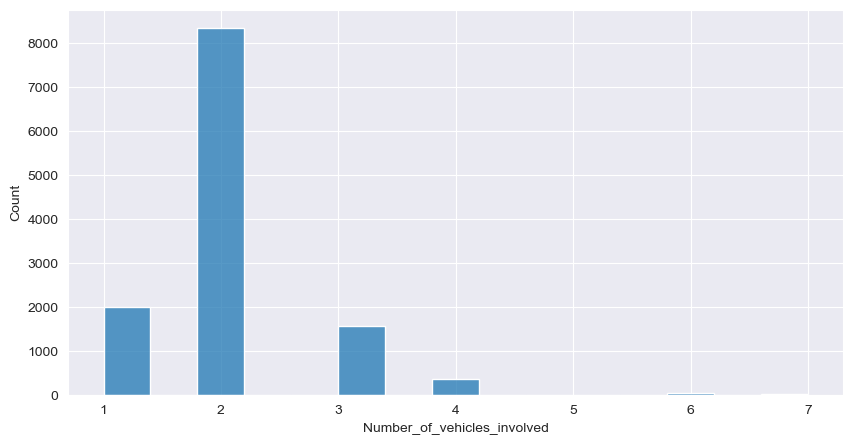

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(df['Number_of_vehicles_involved'])
plt.show()

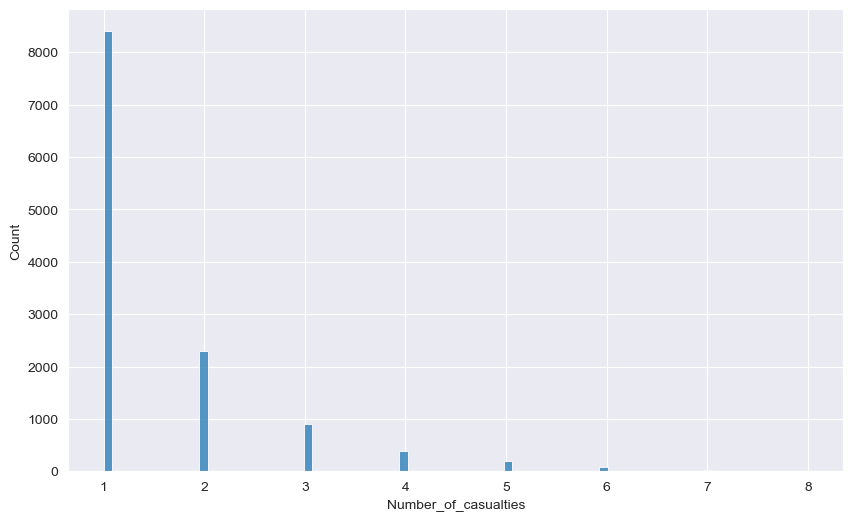

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(df['Number_of_casualties'])
plt.show()

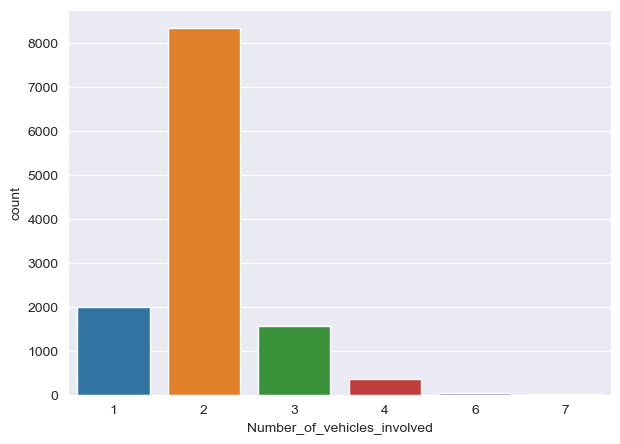

In [23]:
plt.figure(figsize=(7,5))
sns.countplot(x = df['Number_of_vehicles_involved'])
plt.show()

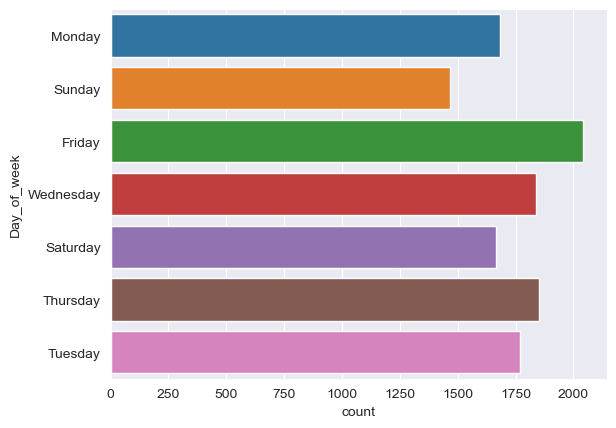

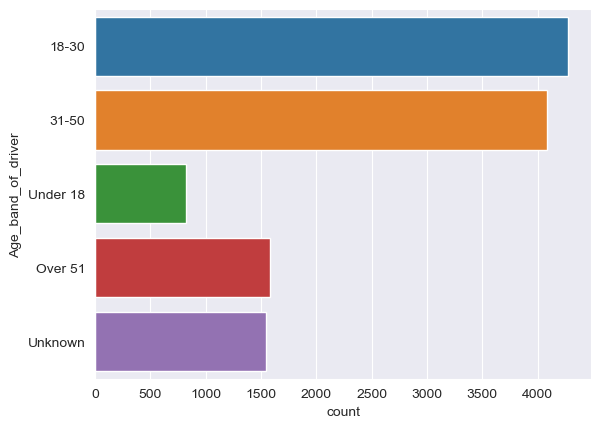

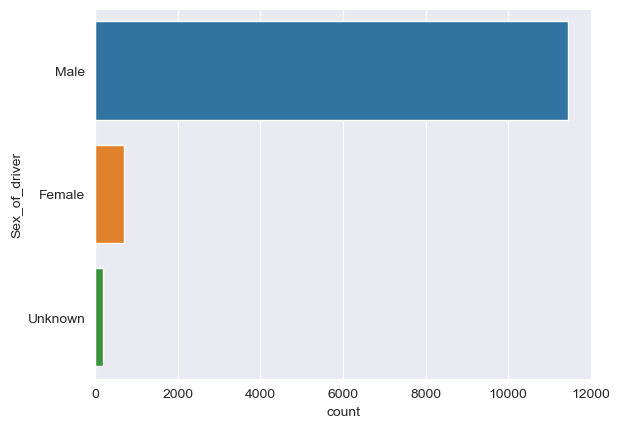

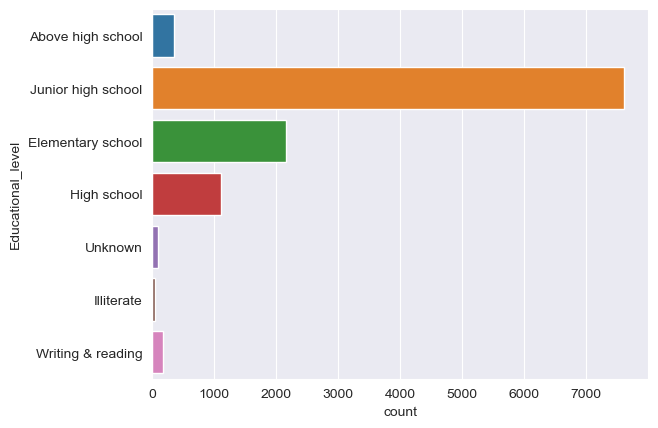

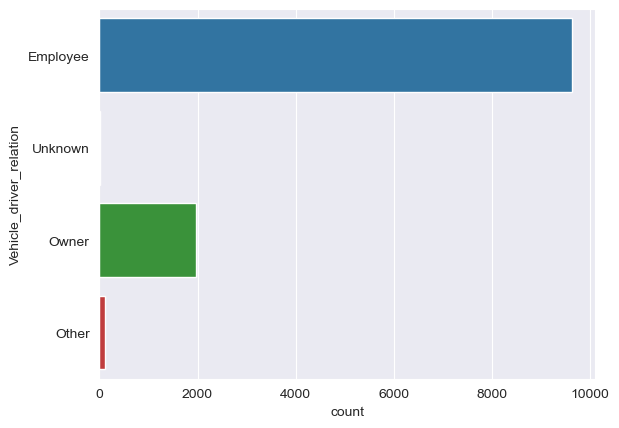

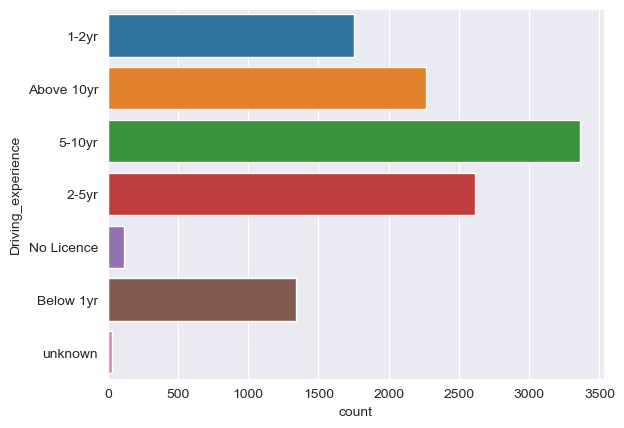

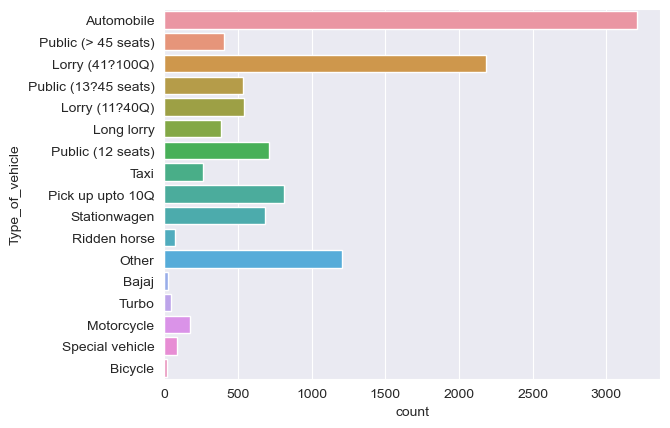

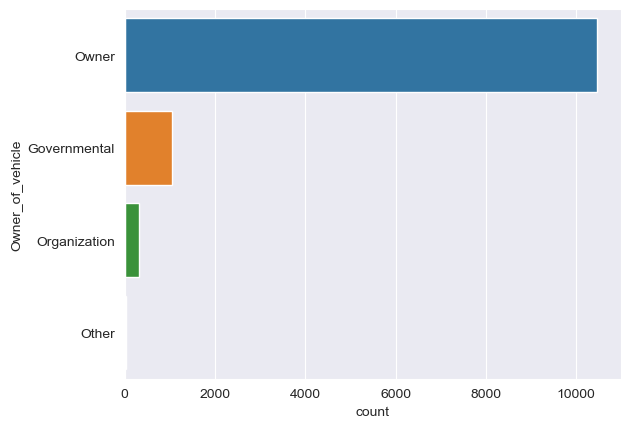

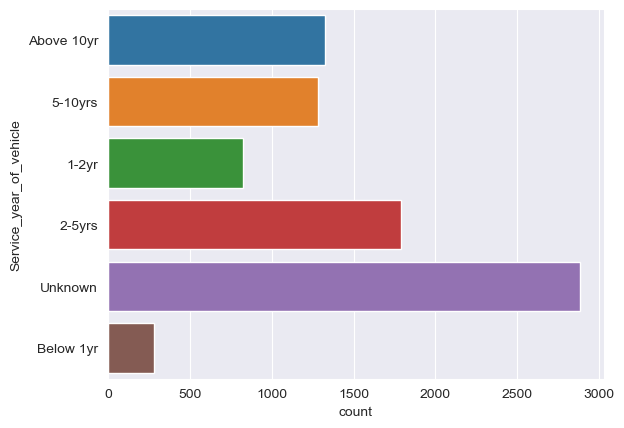

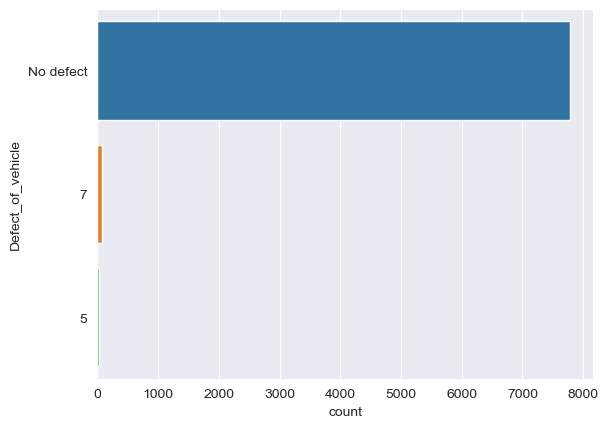

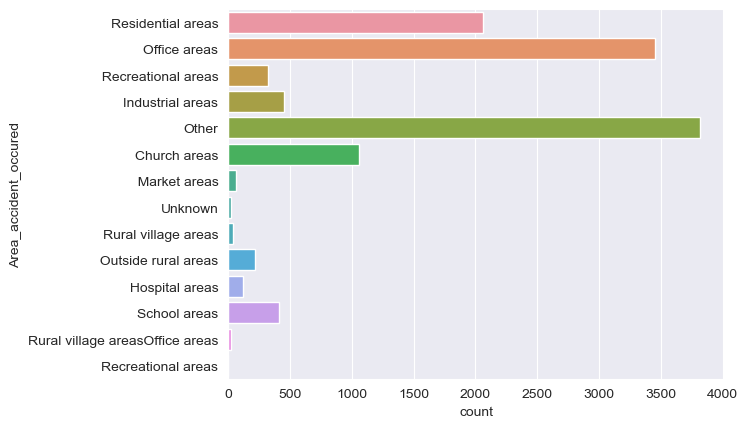

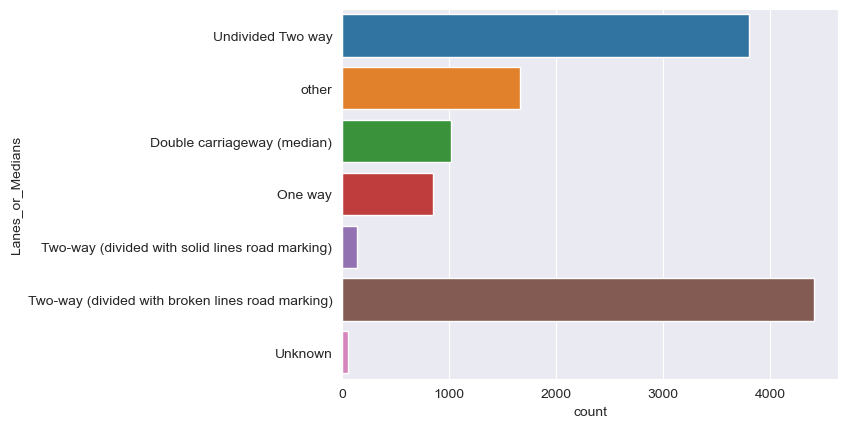

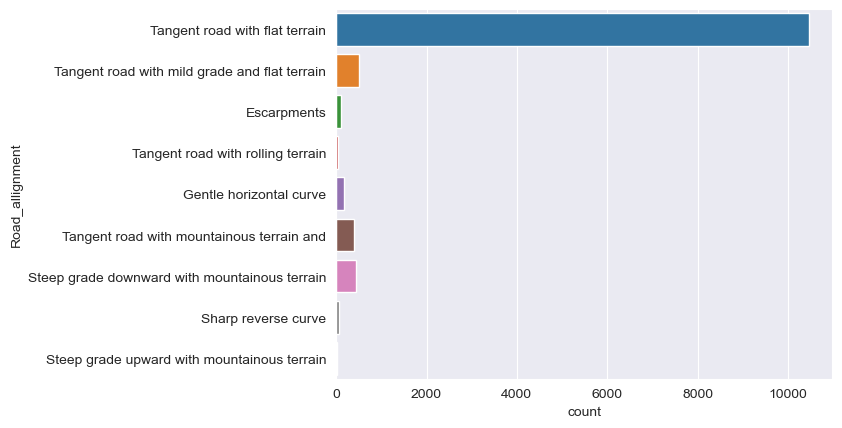

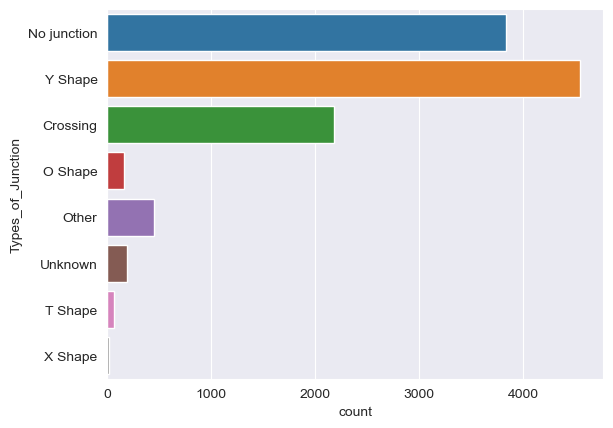

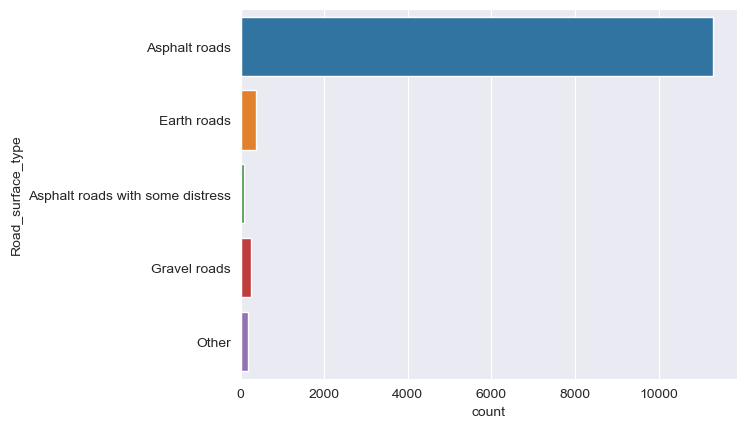

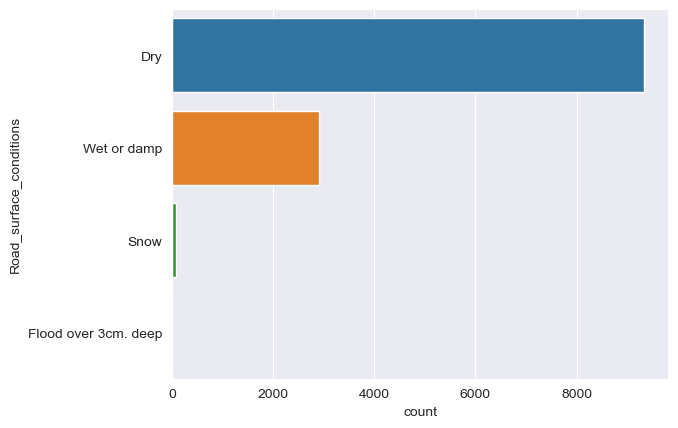

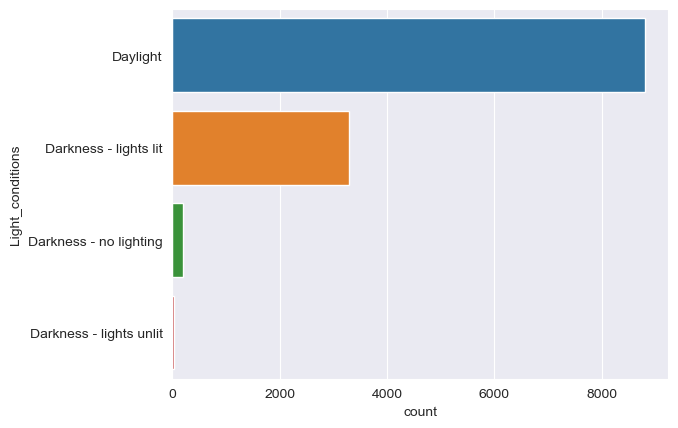

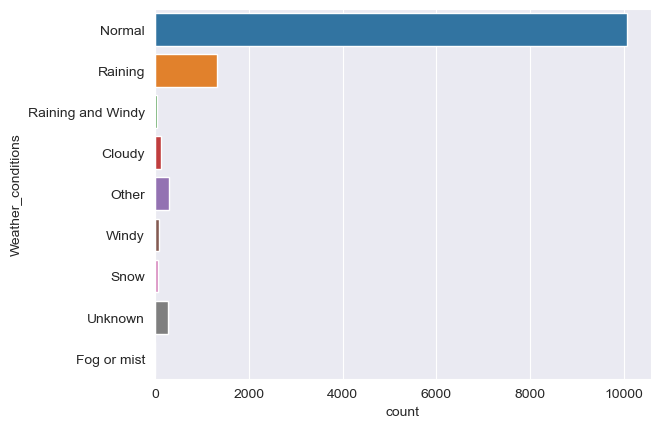

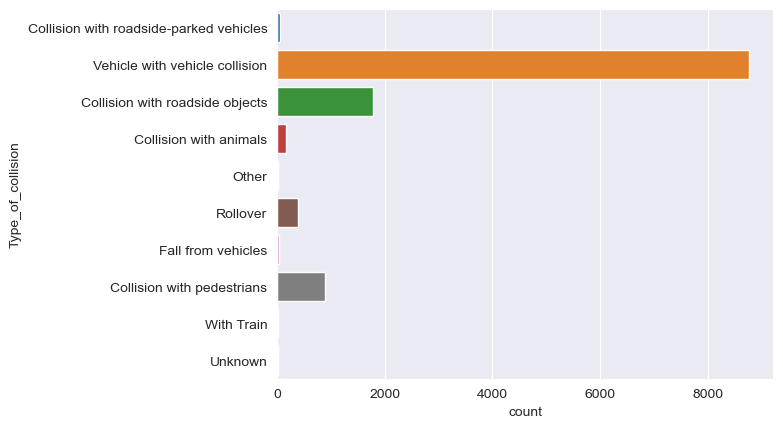

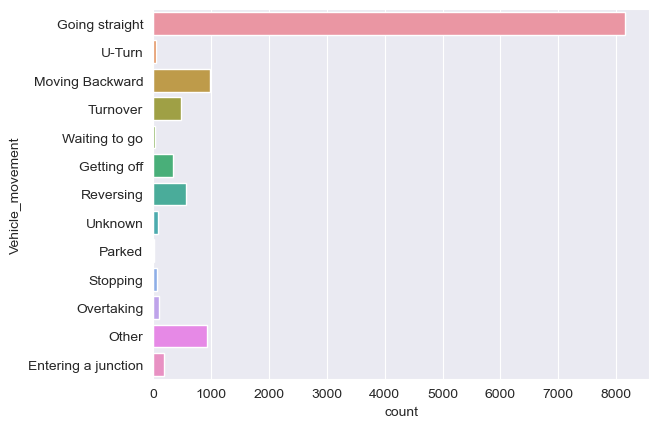

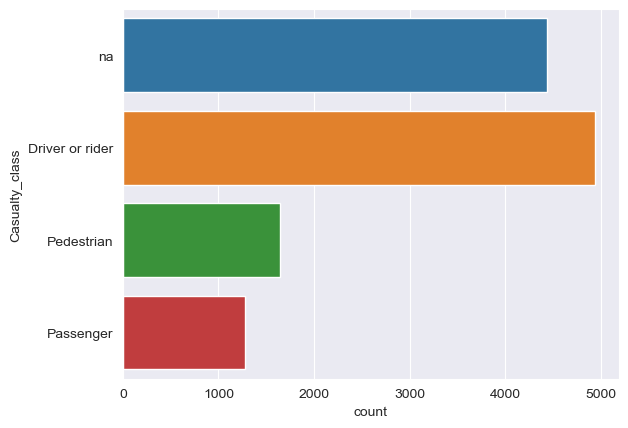

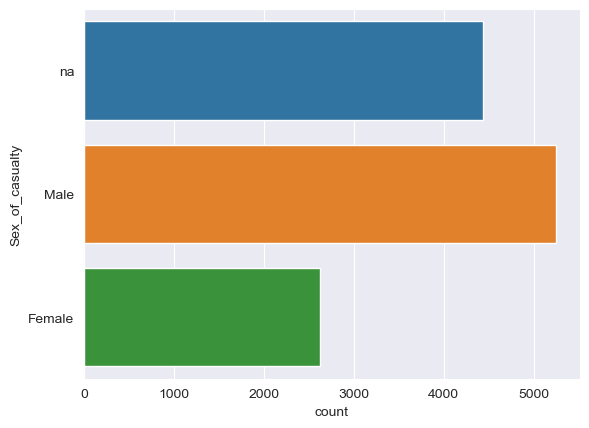

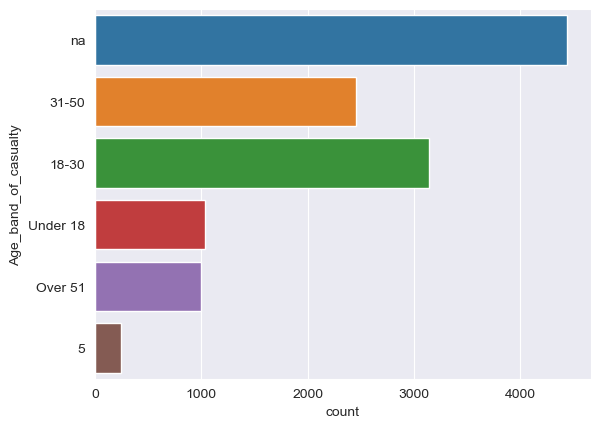

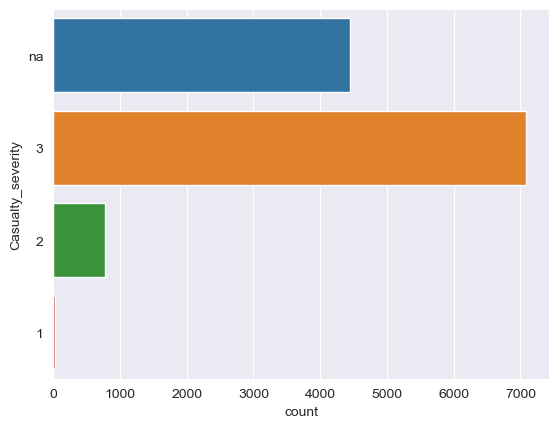

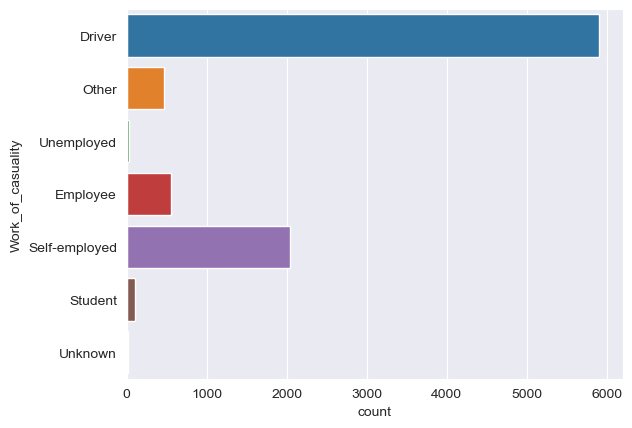

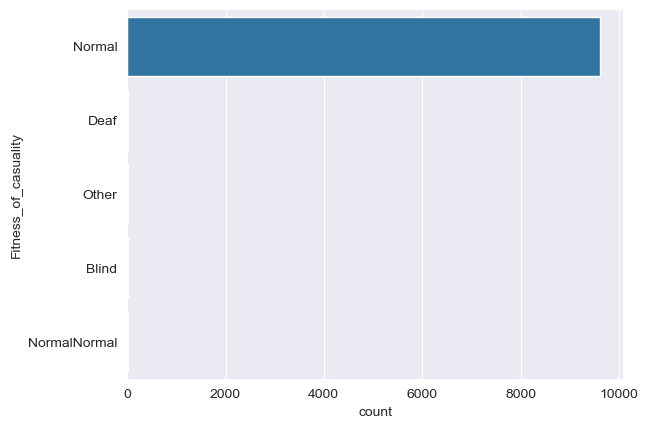

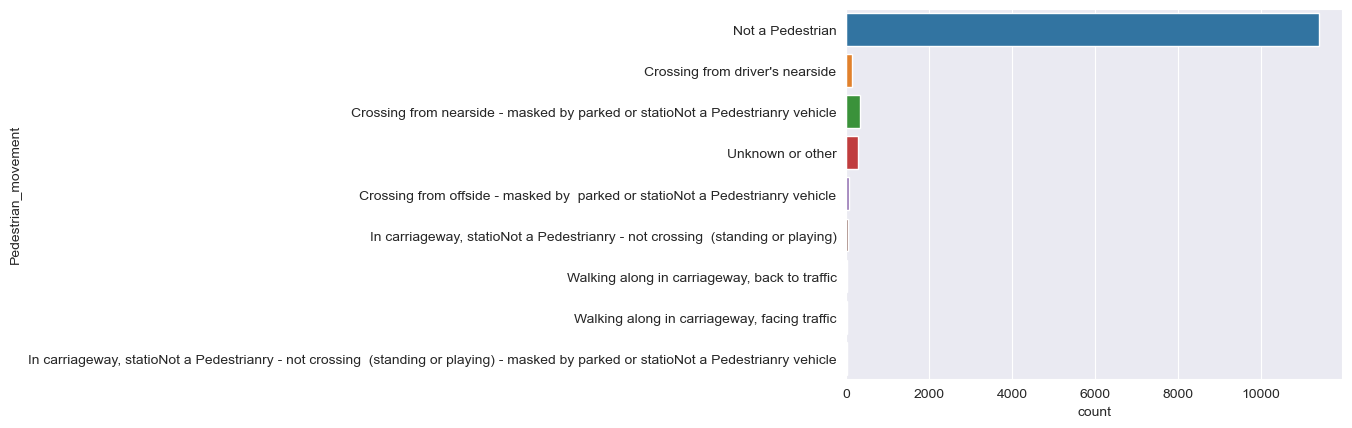

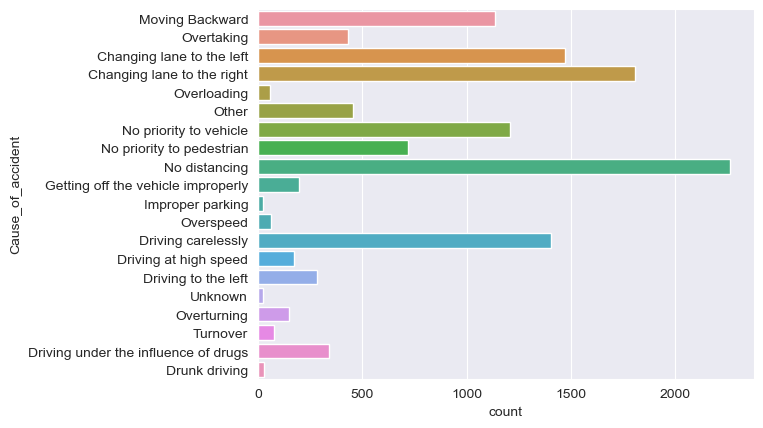

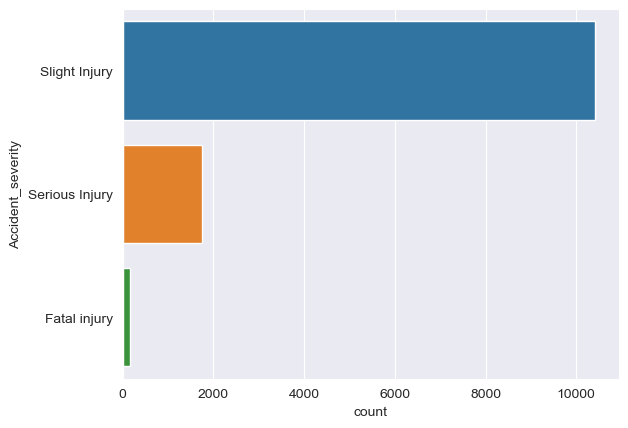

In [24]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 20:
        sns.countplot(y=col,data = df)
        plt.show()

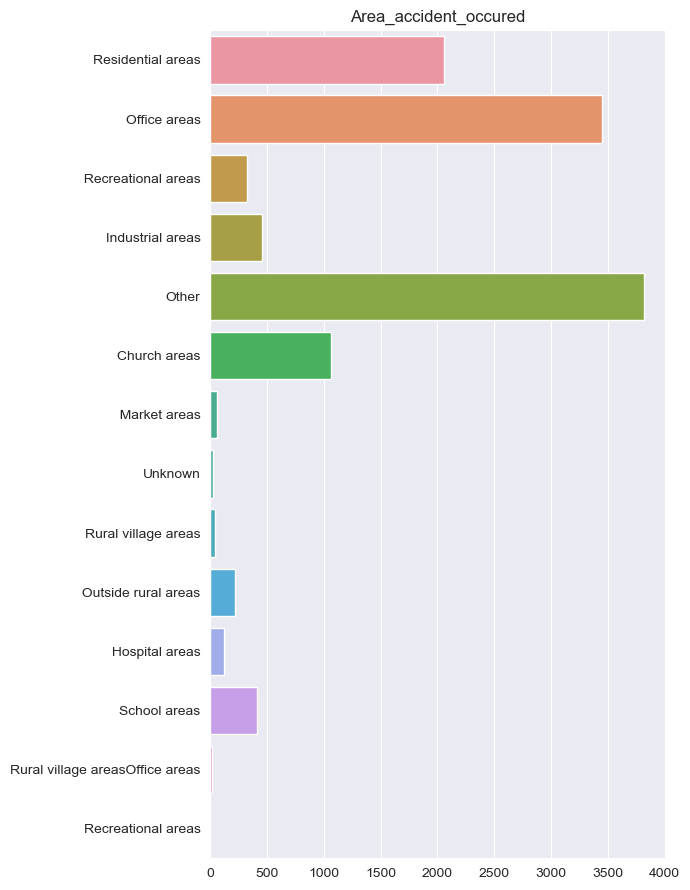

In [25]:
plt.figure(figsize=(7,9))
sns.countplot(data=df,y='Area_accident_occured')
plt.title('Area_accident_occured')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

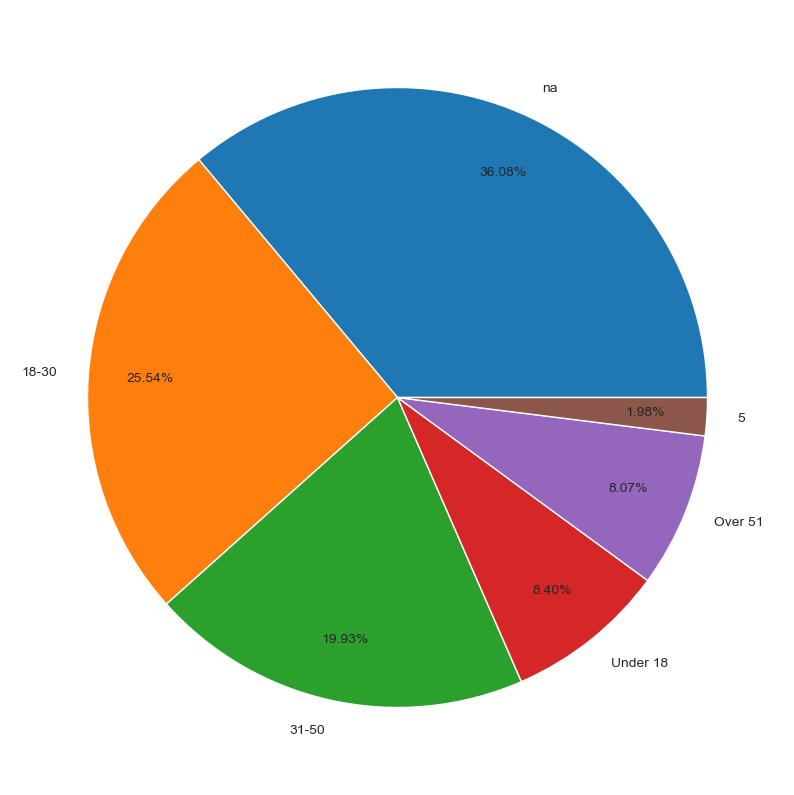

In [26]:
plt.figure(figsize=(10,15))
plt.pie(df['Age_band_of_casualty'].value_counts(),
       labels=list(df["Age_band_of_casualty"].value_counts().index),
       autopct='%1.2f%%',
        pctdistance=0.8,);
plt.show()

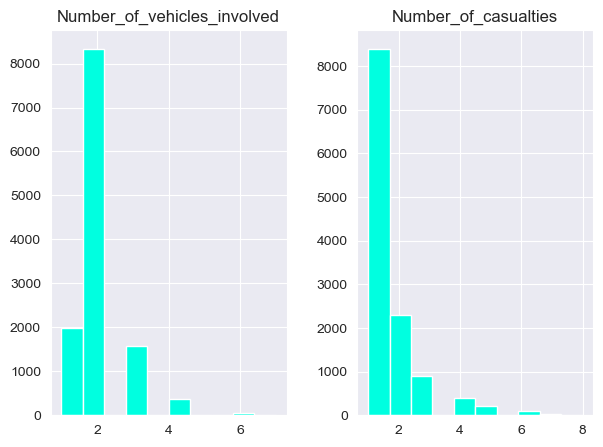

In [27]:
df.hist(figsize=(7,5), color = "#00FFE0")
plt.show()

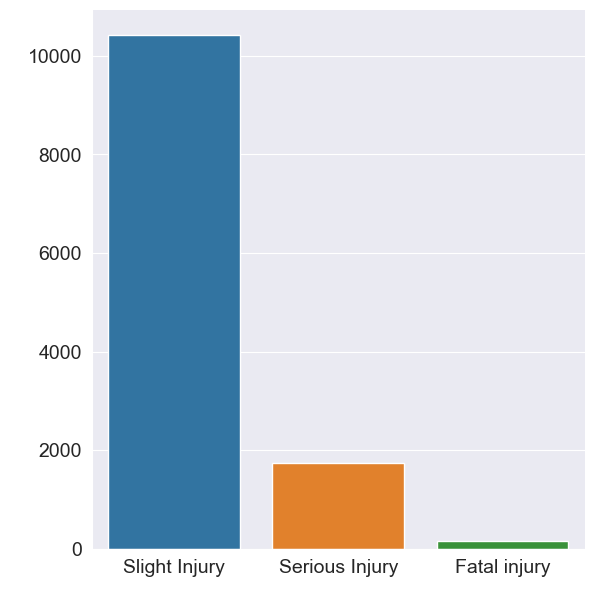

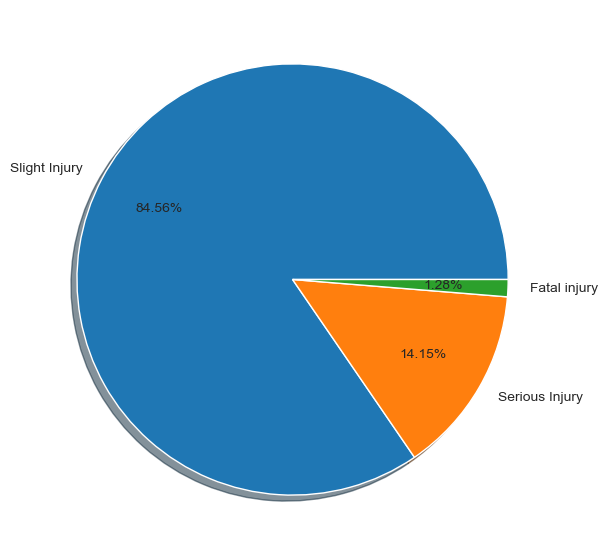

In [28]:
plt.figure(figsize=(14,7))
ax = plt.subplot(1,2,1)
sns.countplot(x=df["Accident_severity"])
ax.set_xlabel(" ")
ax.set_ylabel(" ")
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
sns.despine(right=True,top=True)
plt.figure(figsize=(14,7))
plt.pie(df["Accident_severity"].value_counts(),
       labels=df["Accident_severity"].unique(),
       autopct='%1.2f%%',
       shadow=True,
       pctdistance=0.7,
       radius=1.0);
plt.show()

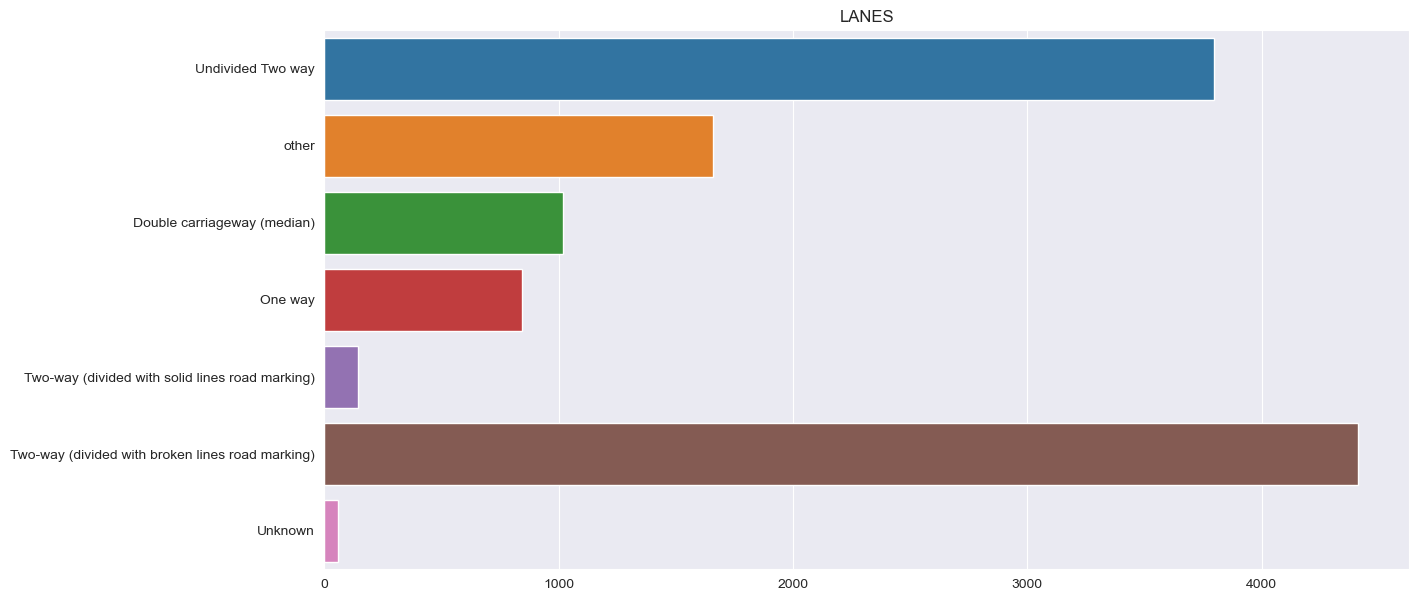

In [29]:
plt.figure(figsize=(14,7))
sns.countplot(data=df,y='Lanes_or_Medians')
plt.xlabel('')
plt.ylabel('')
plt.title('LANES')
plt.show()

In [30]:
df['Time'] = pd.to_datetime(df['Time'])

In [31]:
df['hour'] = df['Time'].dt.hour
df['minute'] = df['Time'].dt.minute
df.drop('Time', axis=1, inplace=True)

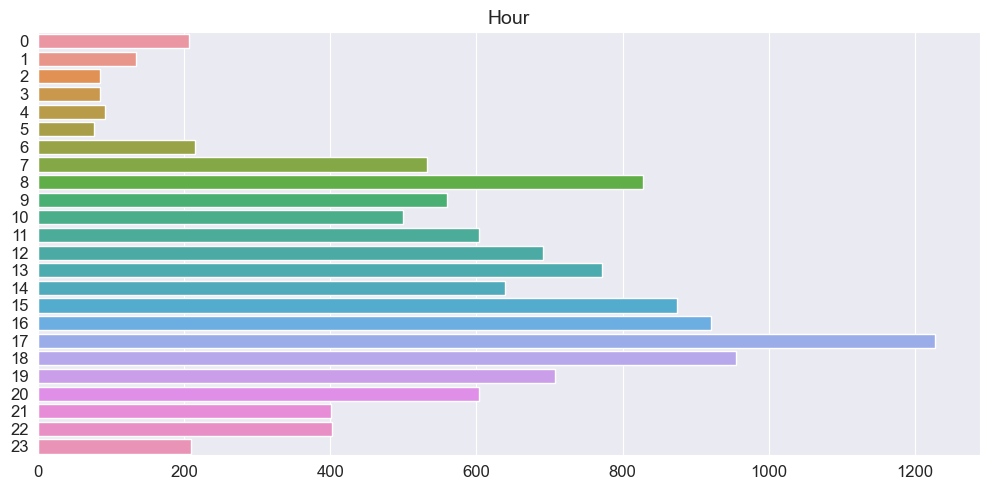

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y=df['hour'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

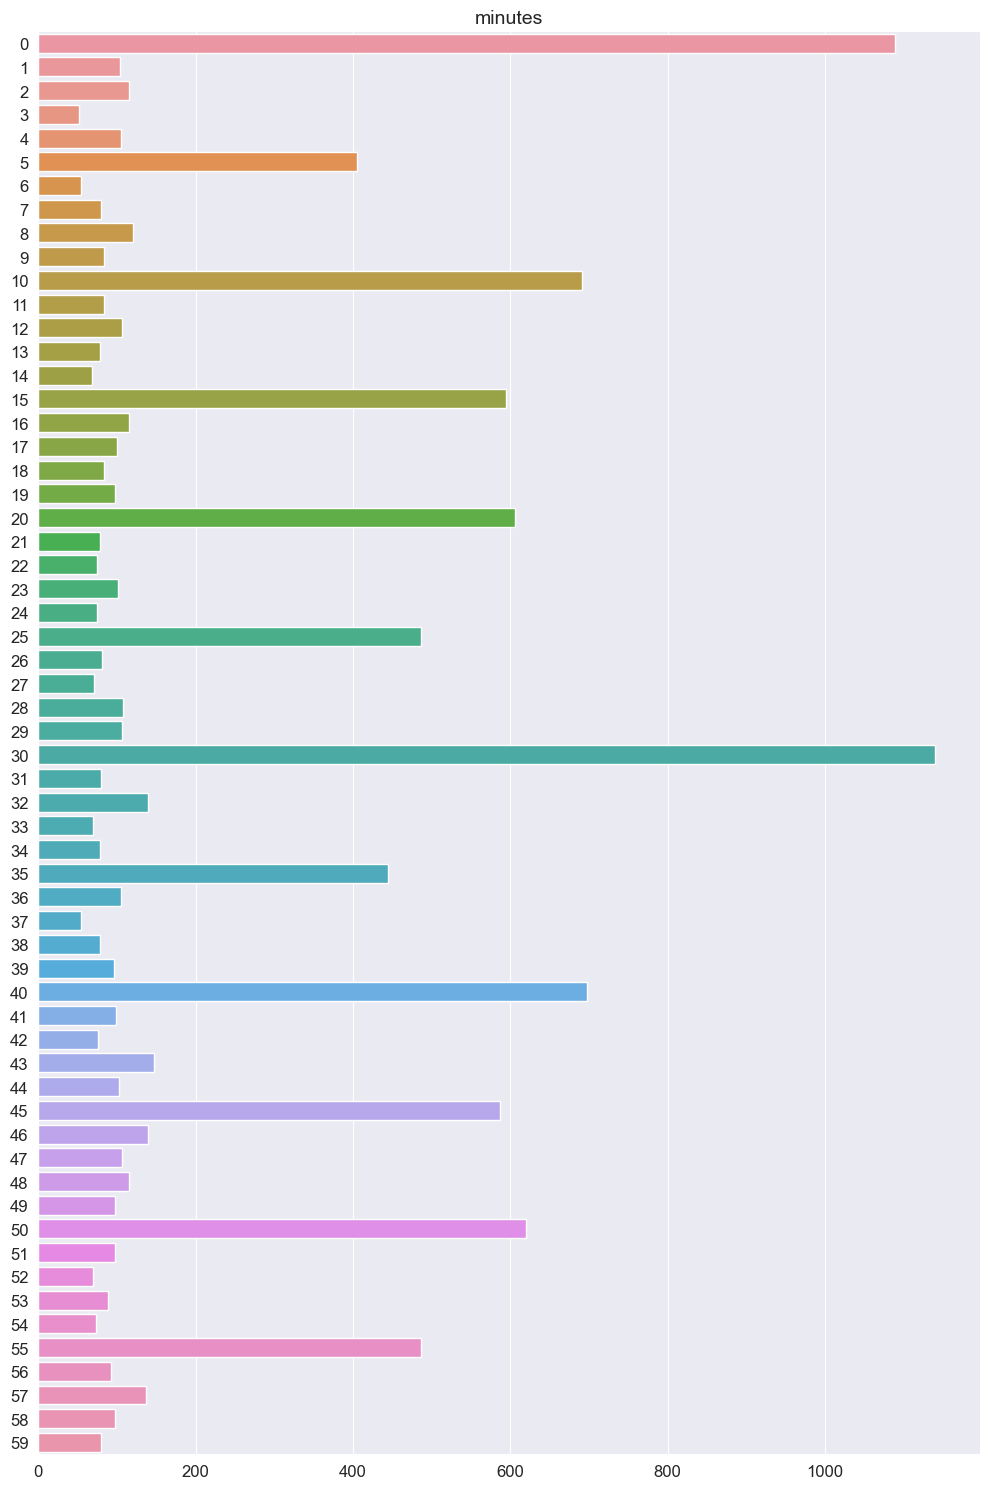

In [33]:
plt.figure(figsize=(10,15))
sns.countplot(data=df, y=df['minute'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('minutes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [34]:
num_cols = df.dtypes[df.dtypes == 'int64'].index.tolist()
cat_cols = df.dtypes[df.dtypes != 'int64'].index.tolist()
df[cat_cols]

Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0          Monday              18-30          Male   Above high school   
1          Monday              31-50          Male  Junior high school   
2          Monday              18-30          Male  Junior high school   
3          Sunday              18-30          Male  Junior high school   
4          Sunday              18-30          Male  Junior high school   
...           ...                ...           ...                 ...   
12311   Wednesday              31-50          Male                 NaN   
12312      Sunday            Unknown          Male   Elementary school   
12313      Sunday            Over 51          Male  Junior high school   
12314      Sunday              18-30        Female  Junior high school   
12315      Sunday              18-30          Male  Junior high school   

      Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                    Employee              1-2yr           Automobile   
1                    Employee         Above 10yr  Public (> 45 seats)   
2                    Employee              1-2yr      Lorry (41?100Q)   
3                    Employee             5-10yr  Public (> 45 seats)   
4                    Employee              2-5yr                  NaN   
...                       ...                ...                  ...   
12311                Employee              2-5yr       Lorry (11?40Q)   
12312                Employee             5-10yr           Automobile   
12313                Employee             5-10yr                Bajaj   
12314                Employee         Above 10yr      Lorry (41?100Q)   
12315                Employee             5-10yr                Other   

      Owner_of_vehicle Service_year_of_vehicle Defect_of_vehicle  \
0                Owner              Above 10yr         No defect   
1                Owner                 5-10yrs         No defect   
2                Owner                     NaN         No defect   
3         Governmental                     NaN         No defect   
4                Owner                 5-10yrs         No defect   
...                ...                     ...               ...   
12311            Owner                     NaN         No defect   
12312            Owner                     NaN         No defect   
12313            Owner                  2-5yrs         No defect   
12314            Owner                  2-5yrs         No defect   
12315            Owner                  2-5yrs         No defect   

      Area_accident_occured                                  Lanes_or_Medians  \
0         Residential areas                                               NaN   
1              Office areas                                 Undivided Two way   
2        Recreational areas                                             other   
3              Office areas                                             other   
4          Industrial areas                                             other   
...                     ...                                               ...   
12311   Outside rural areas                                 Undivided Two way   
12312   Outside rural areas  Two-way (divided with broken lines road marking)   
12313   Outside rural areas  Two-way (divided with broken lines road marking)   
12314          Office areas                                 Undivided Two way   
12315   Outside rural areas                                 Undivided Two way   

                                     Road_allignment Types_of_Junction  \
0                     Tangent road with flat terrain       No junction   
1                     Tangent road with flat terrain       No junction   
2                                                NaN       No junction   
3      Tangent road with mild grade and flat terrain           Y Shape   
4                     Tangent road with flat terrain           Y Shape   
...   

In [35]:

col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}
df.rename(columns=col_map,inplace=True)

In [36]:
df.isna().sum()[df.isna().sum() != 0]

educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
collision_type              155
vehicle_movement            308
casualty_work              3198
casualty_fitness           2635
dtype: int64

In [37]:
df.drop(columns = ['vehicle_defect', 'vehicle_driver_relation', 'casualty_work', 'casualty_fitness',], inplace=True)

In [38]:
imp_cols = [x for x in df.isna().sum()[df.isna().sum() != 0 ].index.tolist()]
for x in imp_cols:
    mode = df[x].mode()[0]
    df[x].fillna(mode, inplace=True)

In [39]:
df.isna().sum()

day_of_week                0
driver_age                 0
driver_sex                 0
educational_level          0
driving_experience         0
vehicle_type               0
vehicle_owner              0
service_year               0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
surface_type               0
road_surface_conditions    0
light_condition            0
weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
pedestrian_movement        0
accident_cause             0
accident_severity          0
hour                       0
minute                     0
dtype: int64

In [40]:
def org_encoder(df, feats): 
    for feat in feats:    
        feats_val = list(1+np.arange(df[feat].nunique()))
        feats_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feats_key, feats_val))
        df[feat] = df[feat].map(feat_dict)
    return df

df = org_encoder(df, df.drop(['accident_severity'], axis=1).columns)
df.shape

(12316, 29)

In [41]:
df

day_of_week  driver_age  driver_sex  educational_level  \
0                2           1           2                  1   
1                2           2           2                  5   
2                2           1           2                  5   
3                4           1           2                  5   
4                4           1           2                  5   
...            ...         ...         ...                ...   
12311            7           2           2                  5   
12312            4           5           2                  2   
12313            4           3           2                  5   
12314            4           1           1                  5   
12315            4           1           2                  5   

       driving_experience  vehicle_type  vehicle_owner  service_year  \
0                       1             1              4             4   
1                       4            12              4             3   
2                       1             6              4             6   
3                       3            12              1             6   
4                       2             1              4             3   
...                   ...           ...            ...           ...   
12311                   2             5              4             6   
12312                   3             1              4             6   
12313                   3             2              4             2   
12314                   4             6              4             2   
12315                   3             8              4             2   

       accident_area  lanes  road_allignment  junction_type  surface_type  \
0                 10      3                6              2             1   
1                  7      5                6              2             1   
2                  2      7                6              2             1   
3                  7      7                7              8             3   
4                  5      7                6              8             1   
...              ...    ...              ...            ...           ...   
12311              6      5                6              2             1   
12312              6      3                1              2             1   
12313              6      3                8              2             1   
12314              7      5                8              2             1   
12315              6      5                8              3             1   

       road_surface_conditions  light_condition  weather_condition  \
0                            1                4                  3   
1                            1                4                  3   
2                            1                4                  3   
3                            1                1                  3   
4                            1                1                  3   
...                        ...              ...                ...   
12311                        1                4                  3   
12312                        1                4                  3   
12313                        1                4                  3   
12314                        1                1                  3   
12315                        1                1                  3   

       collision_type  vehicles_involved  casualties  vehicle_movement  \
0                   4                  2           2                 3   
1                   9                  2           2                 3   
2                   3                  2           2                 3   
3                   9                  2           2                 3   
4                   9                  2           2                 3   
...               ...                ...         ...               ...   
12311               9                  2           1                 3   
123

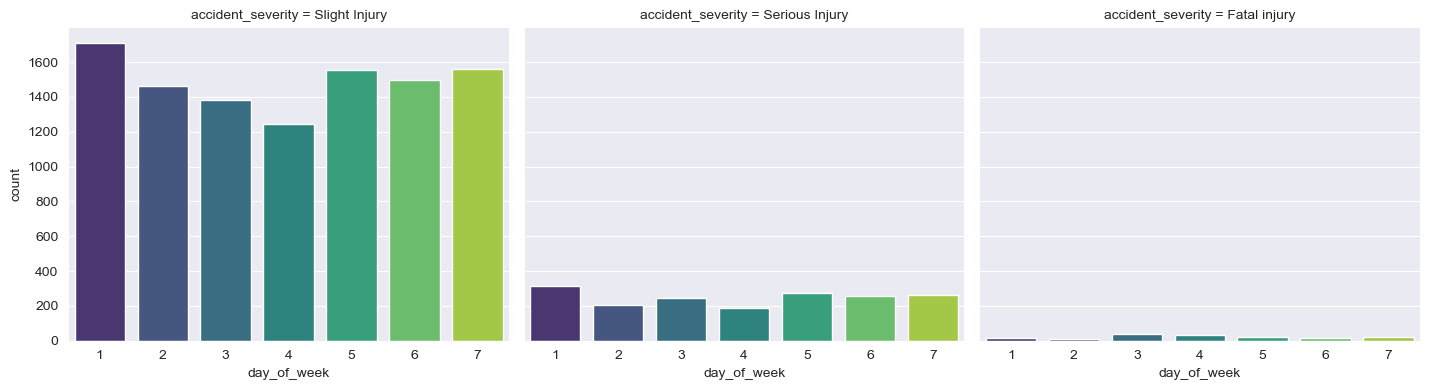

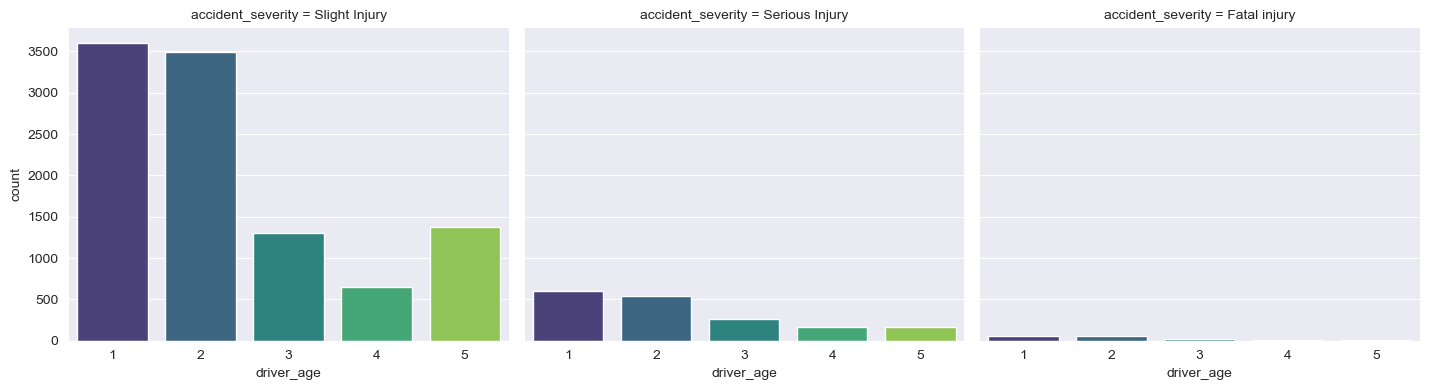

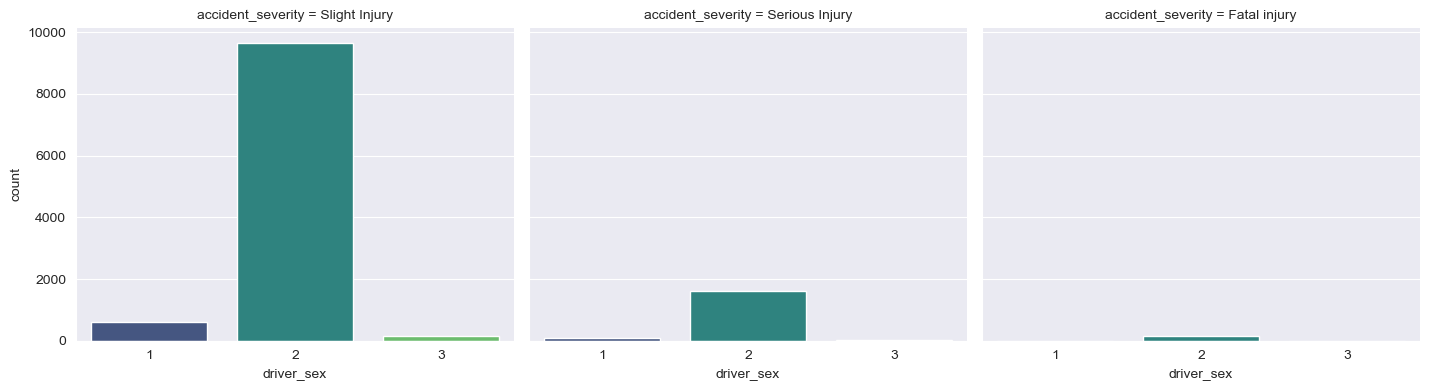

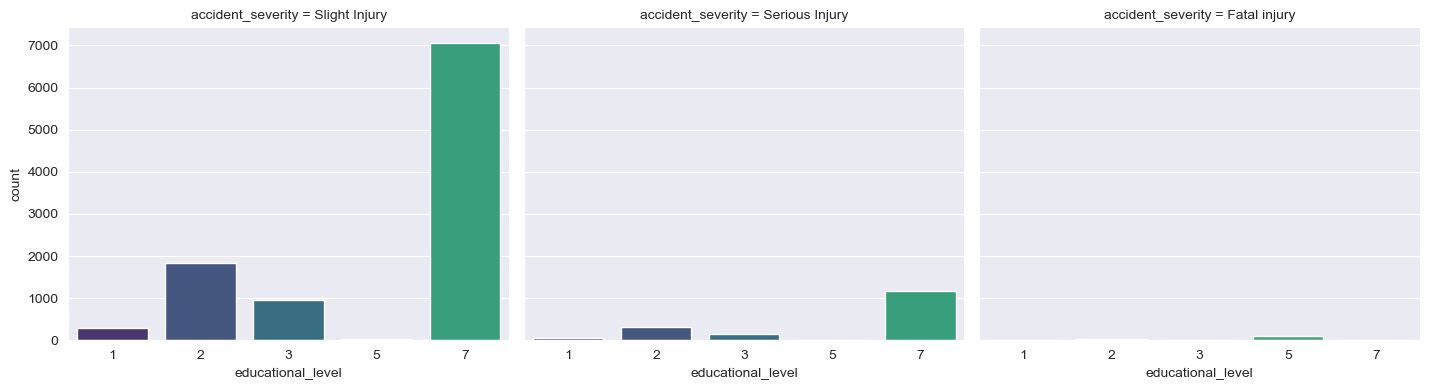

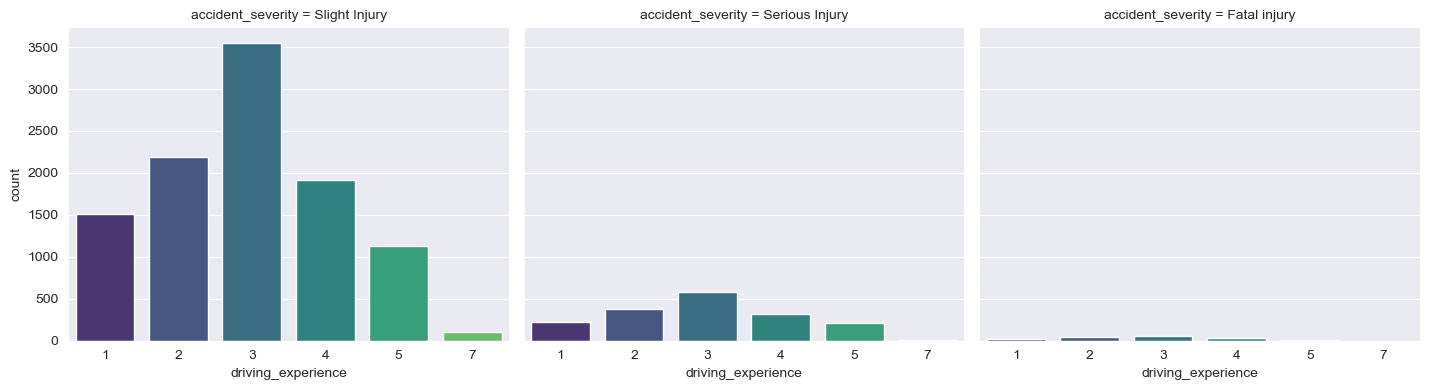

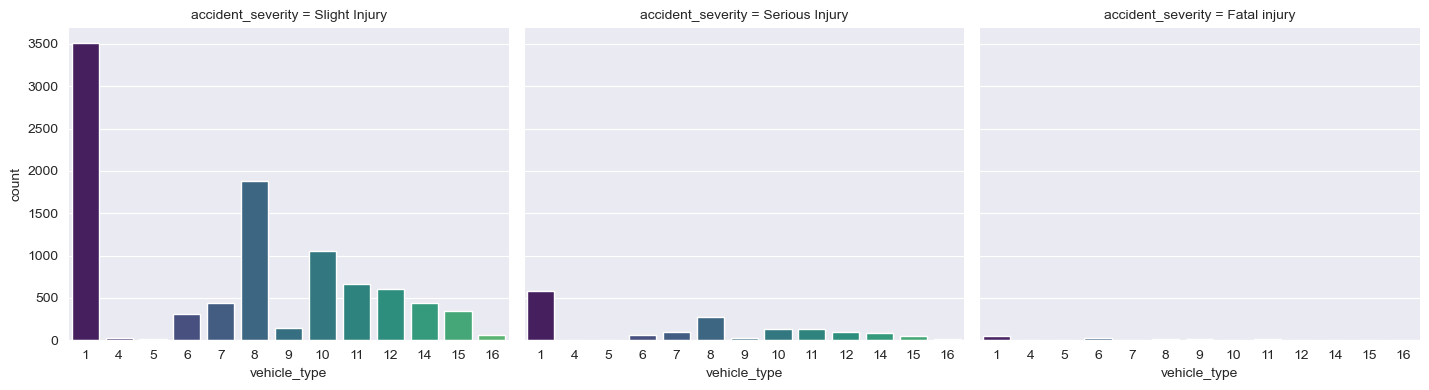

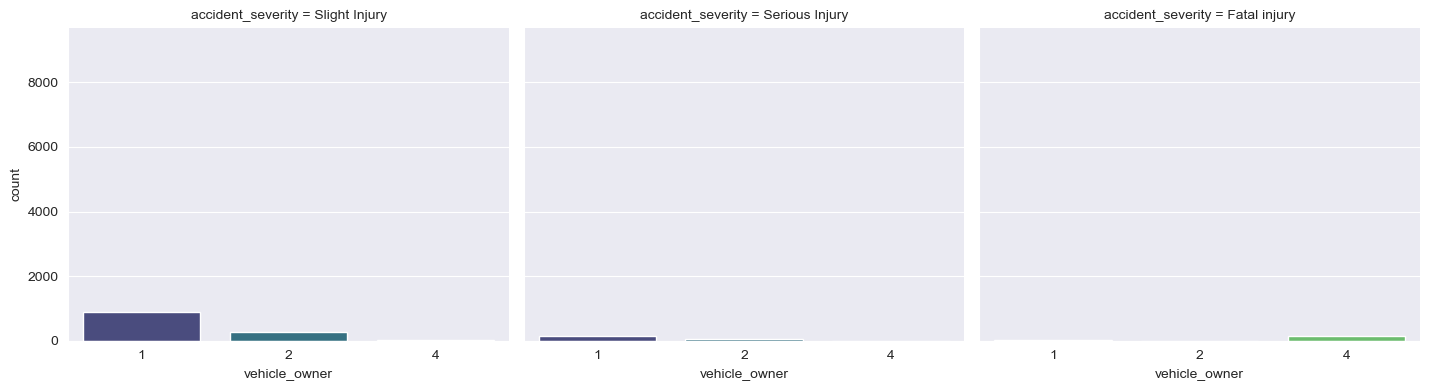

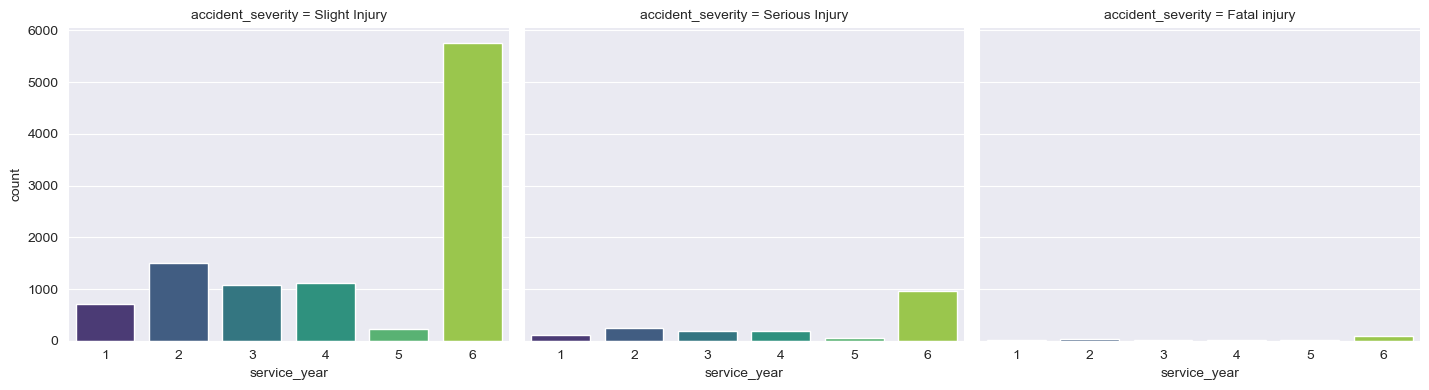

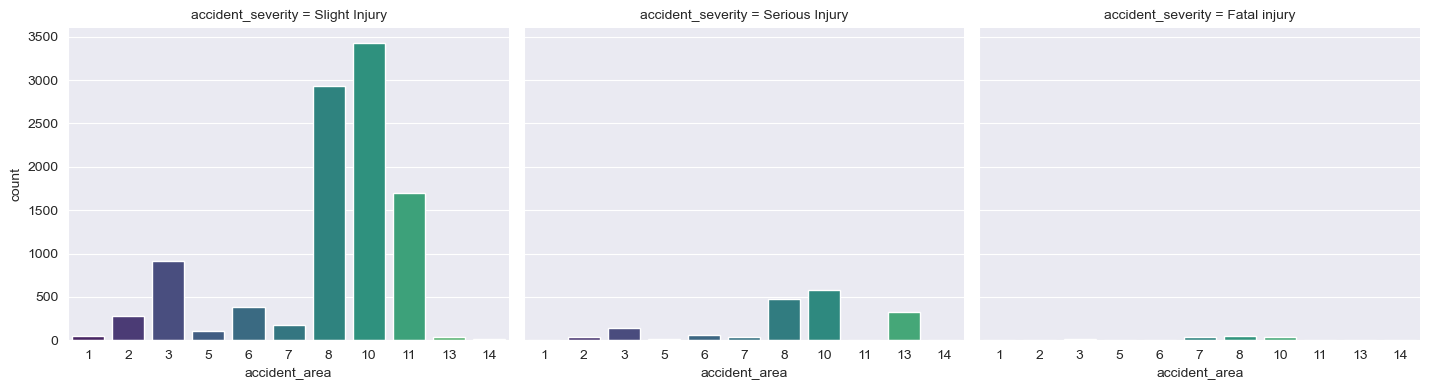

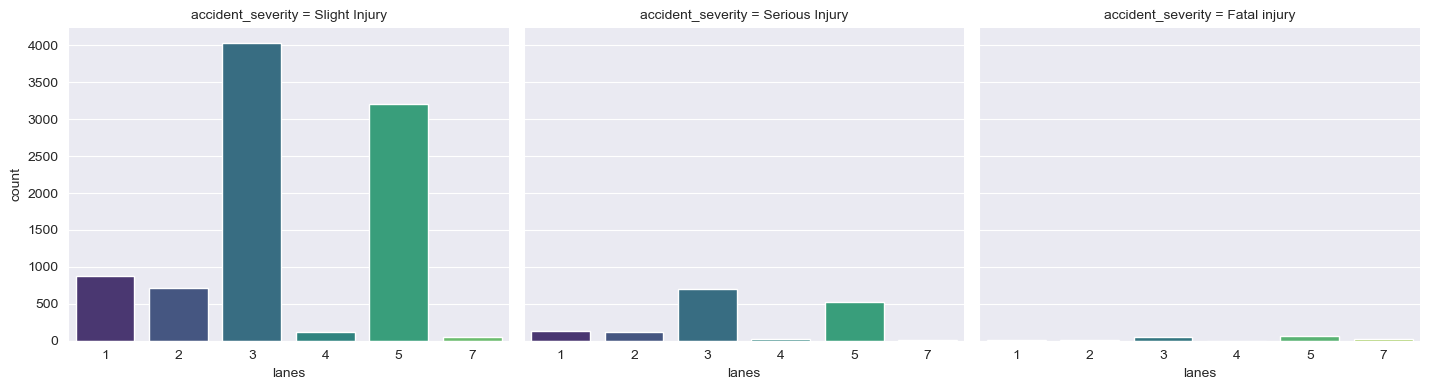

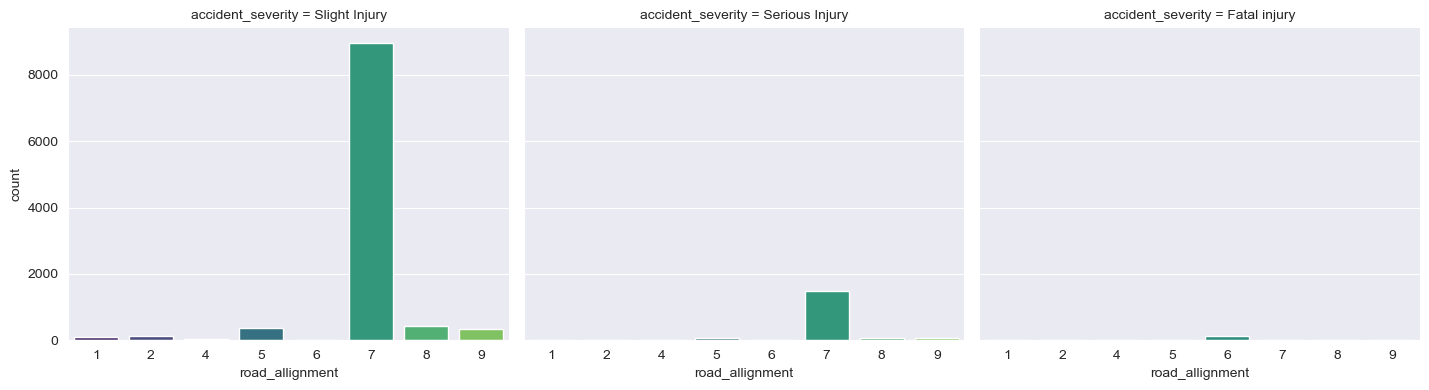

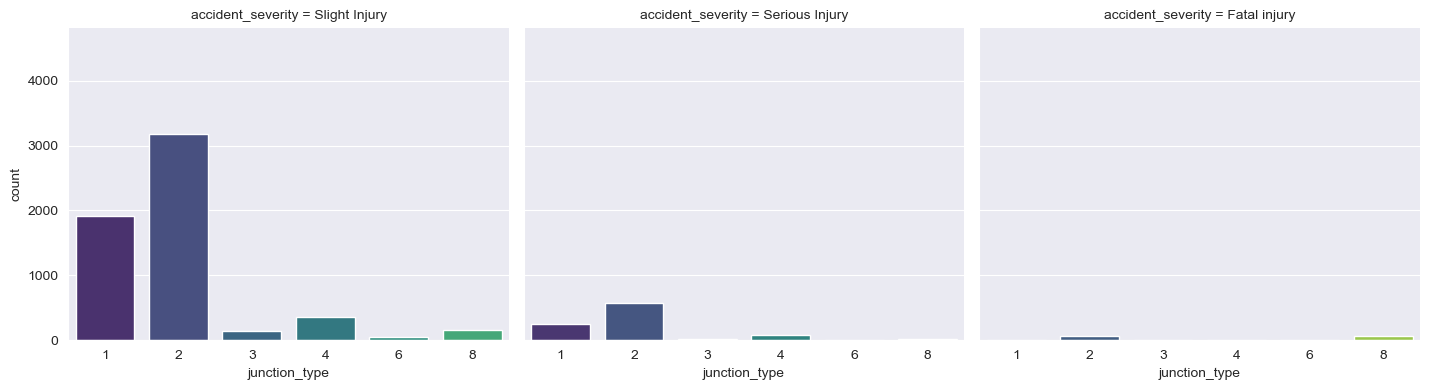

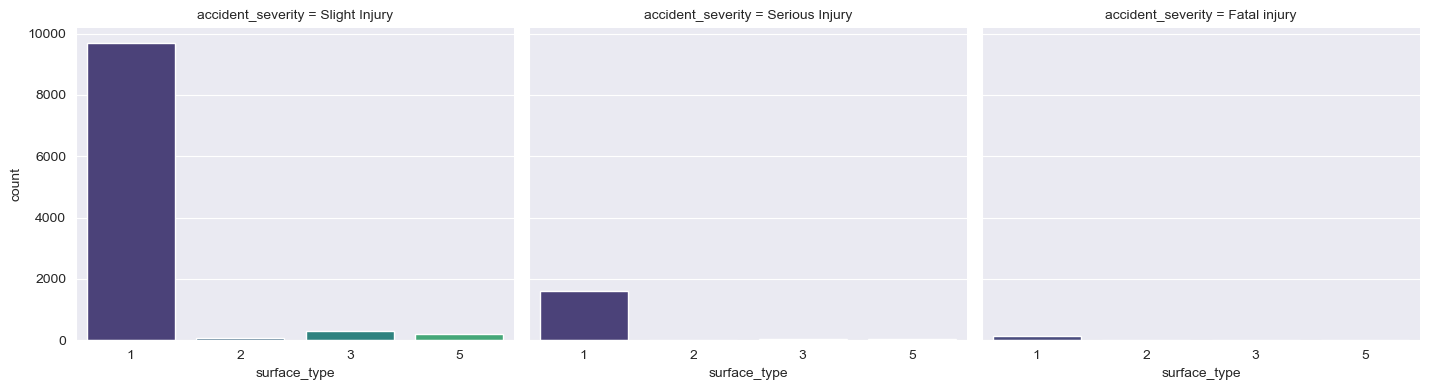

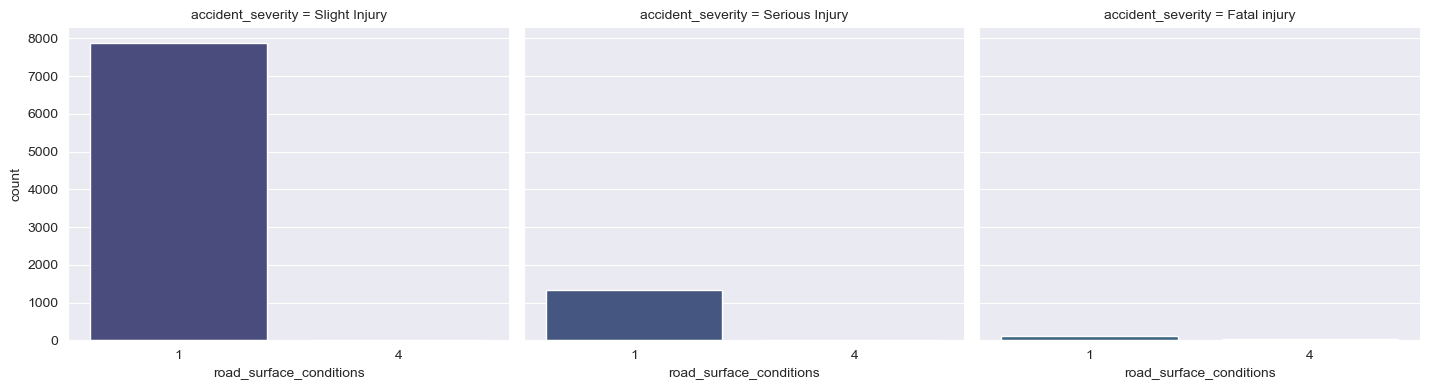

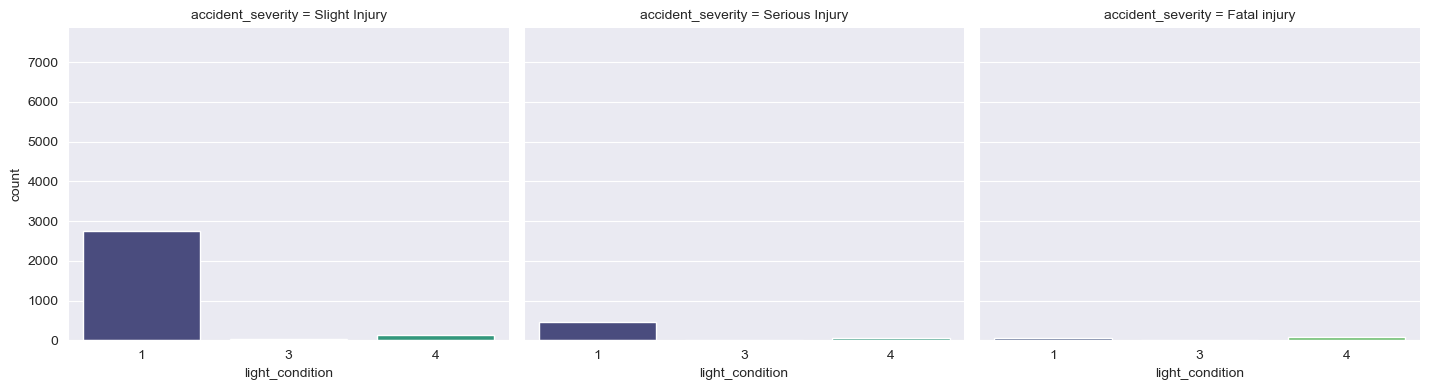

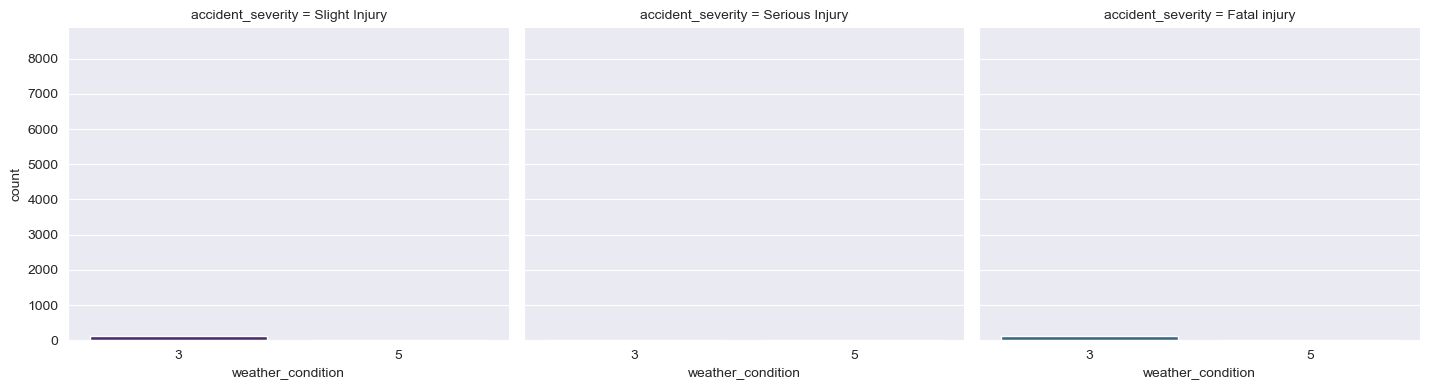

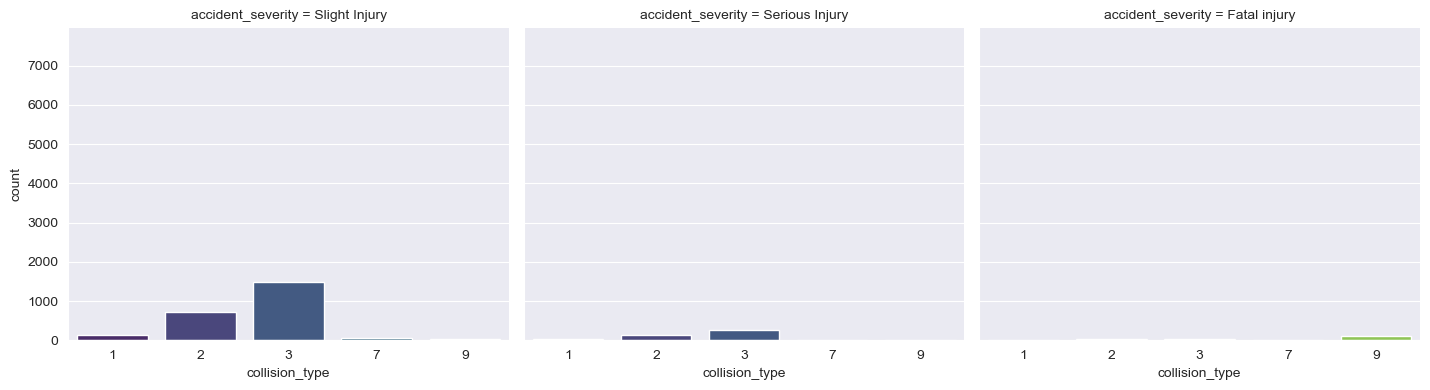

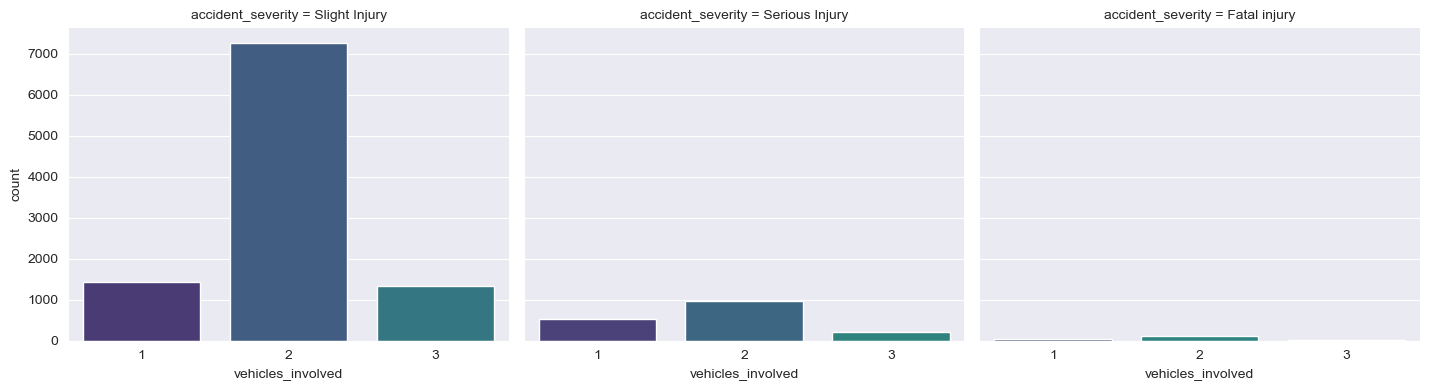

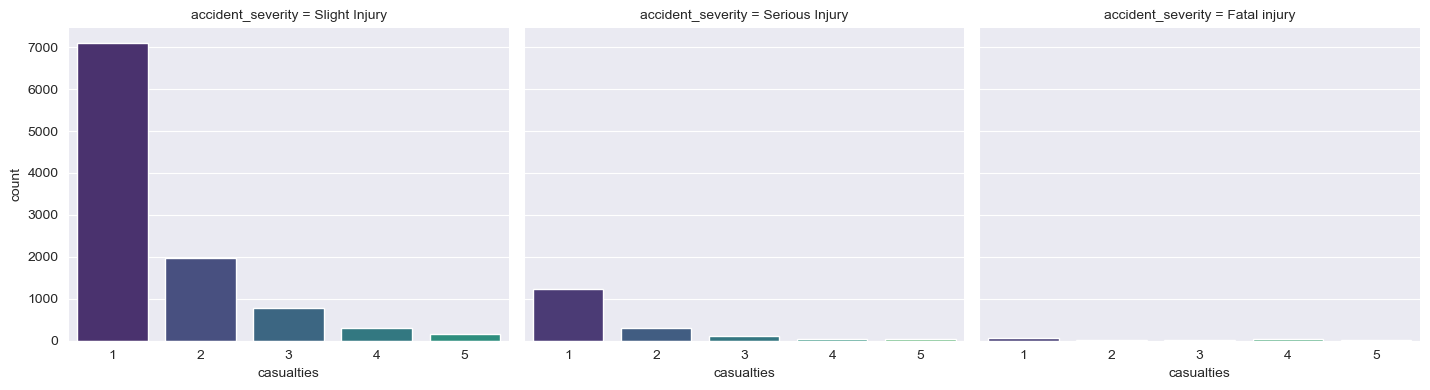

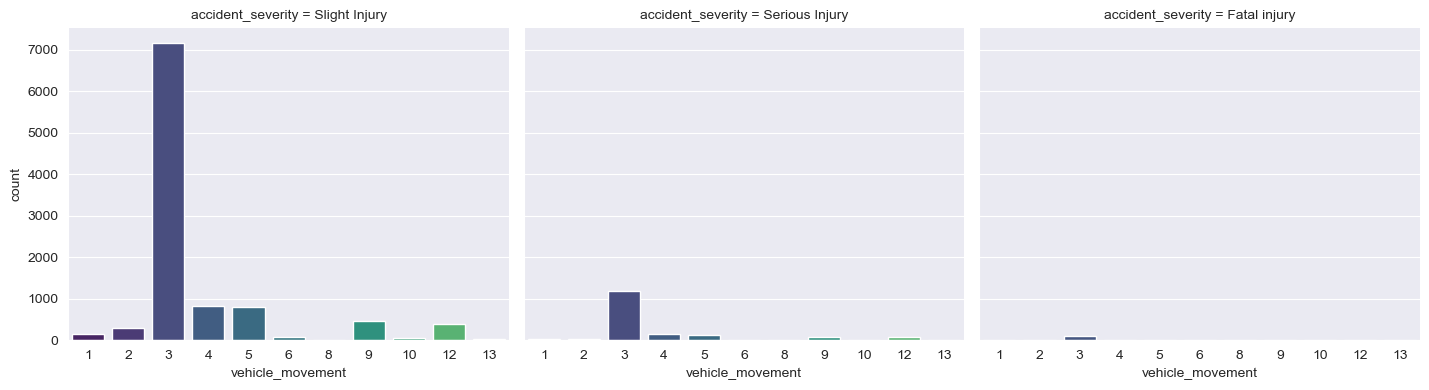

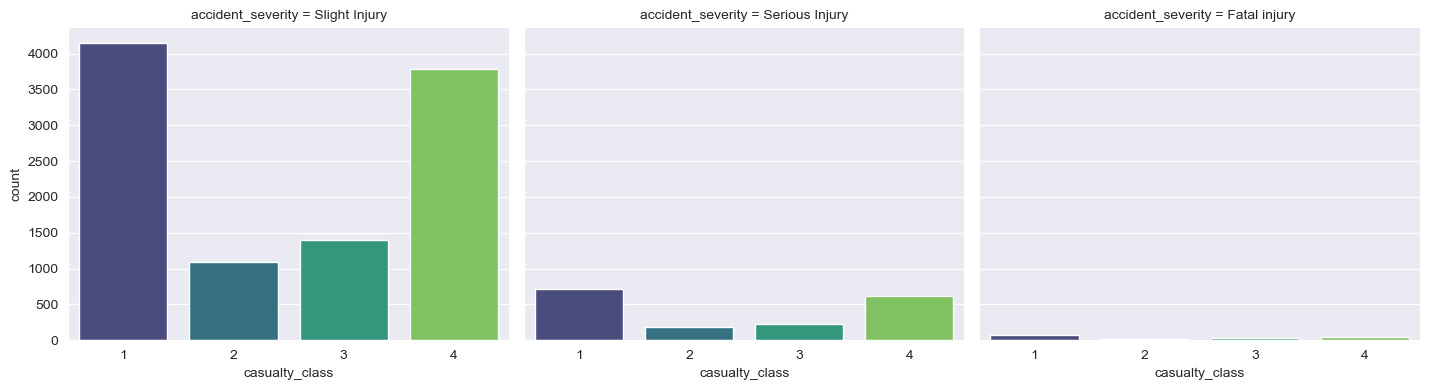

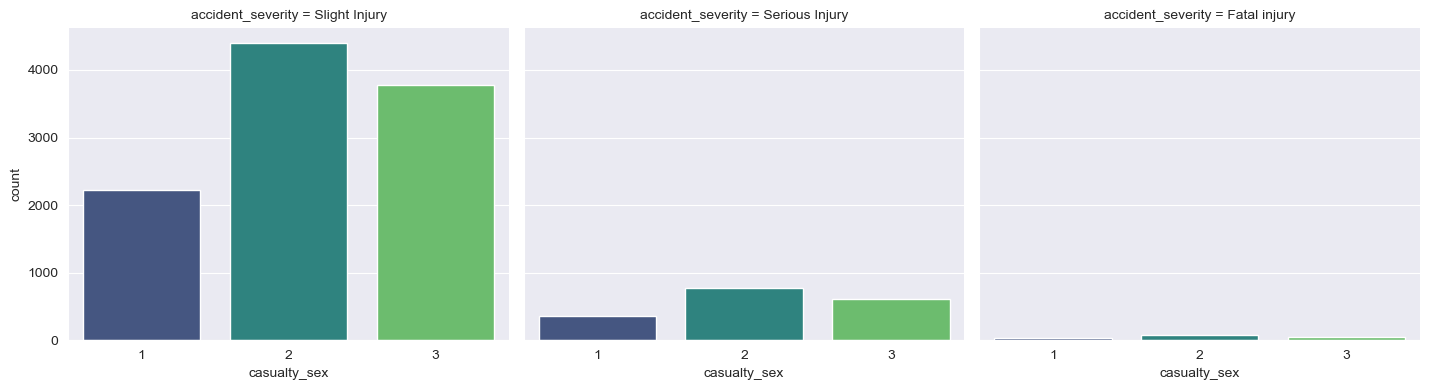

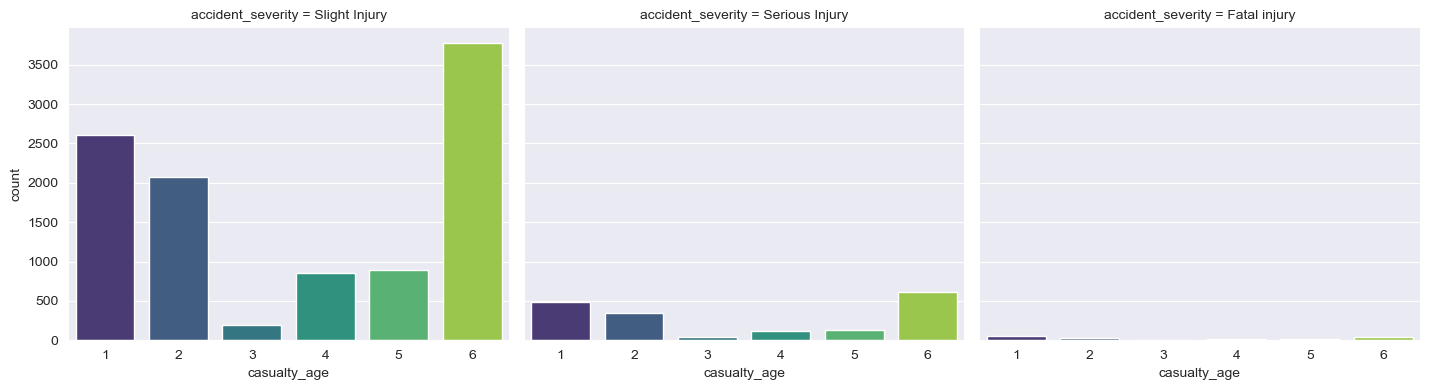

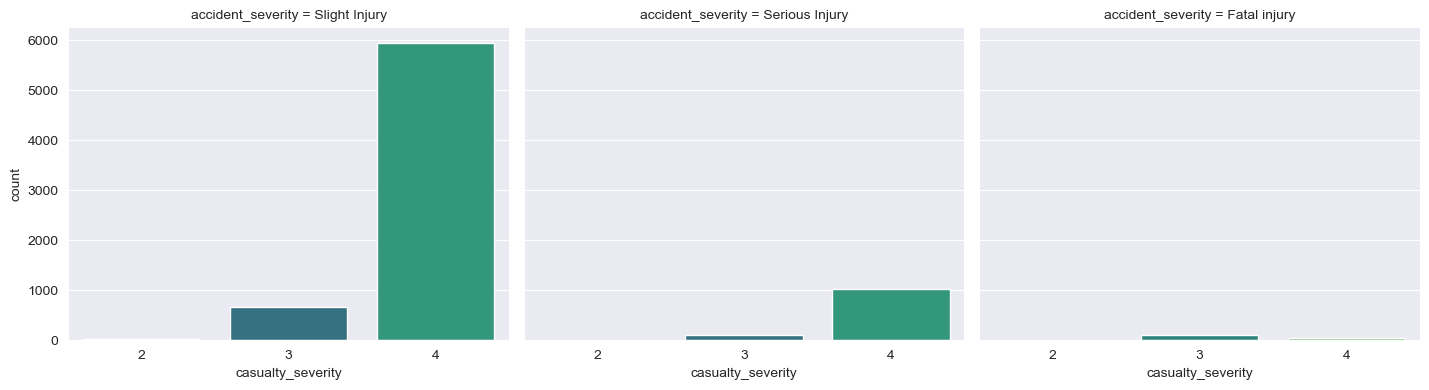

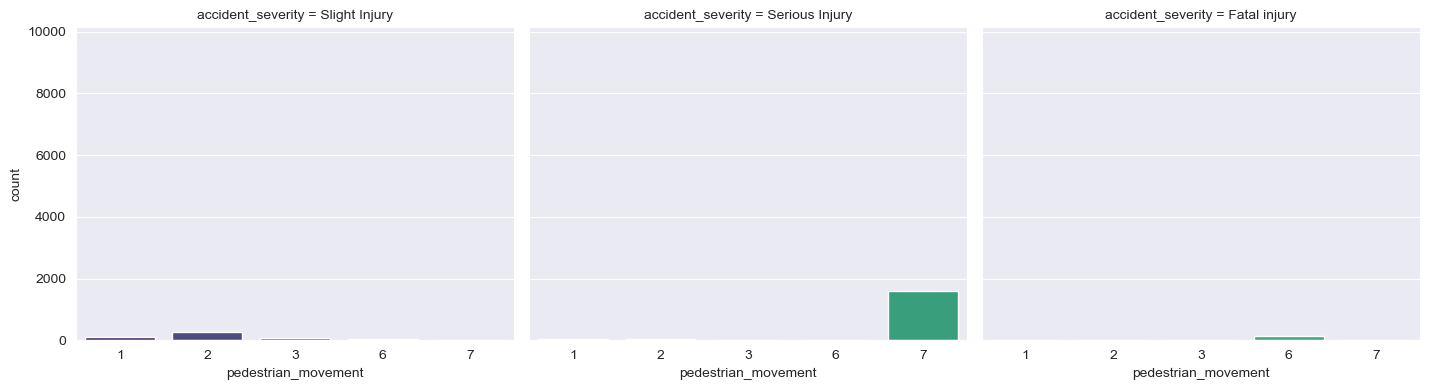

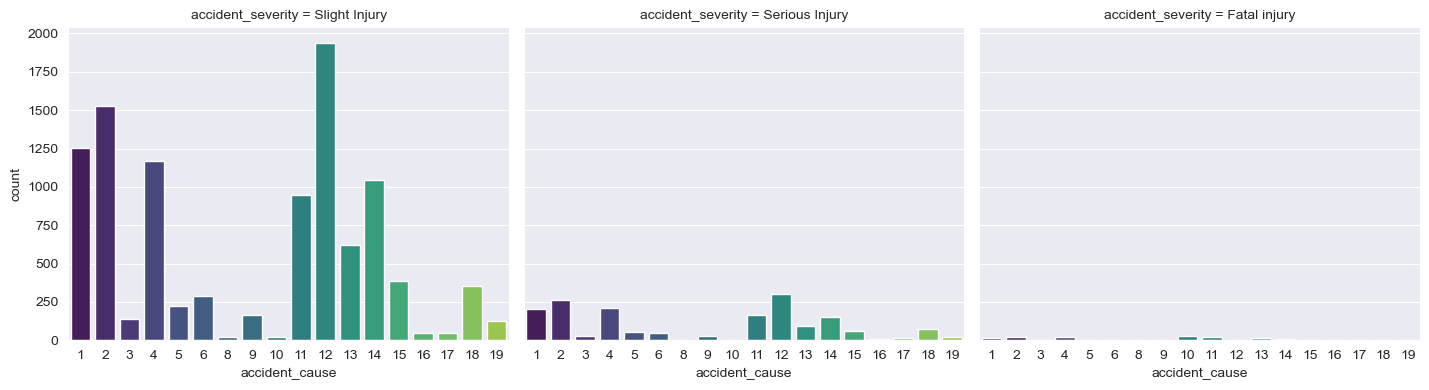

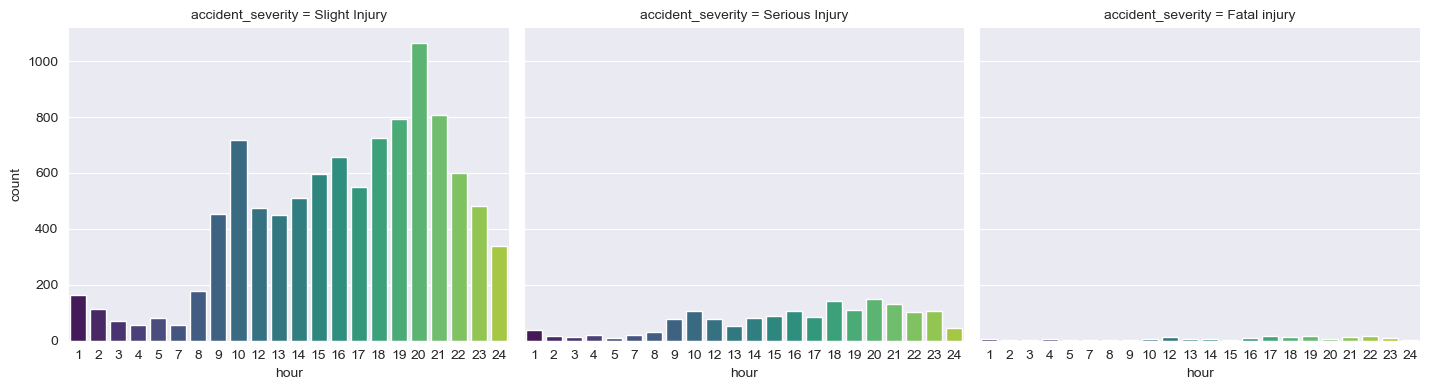

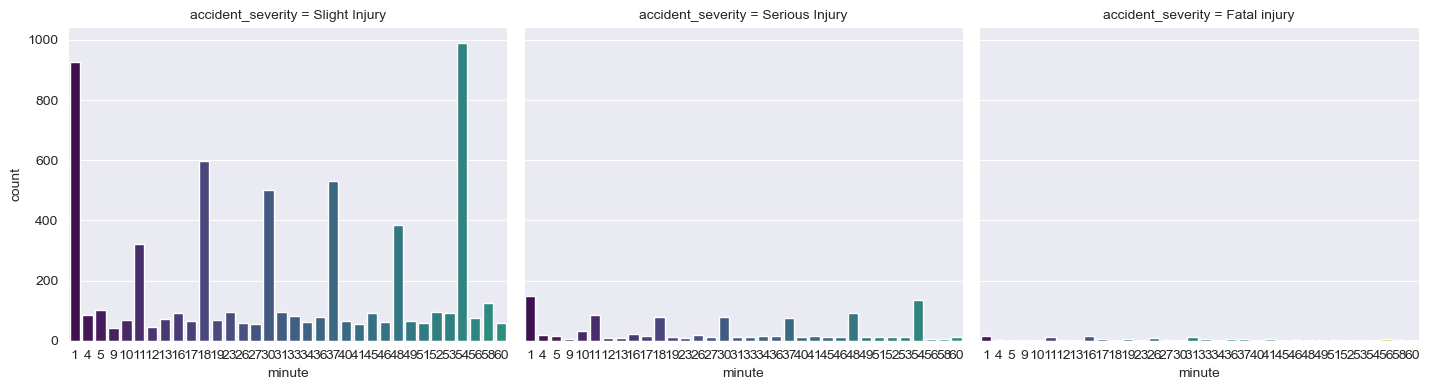

In [42]:
for col in df.drop('accident_severity', axis=1):
    g = sns.FacetGrid(df, col='accident_severity', size=4, aspect=1.2)
    g.map(sns.countplot, col, palette = 'viridis')
    plt.show()

<AxesSubplot:>

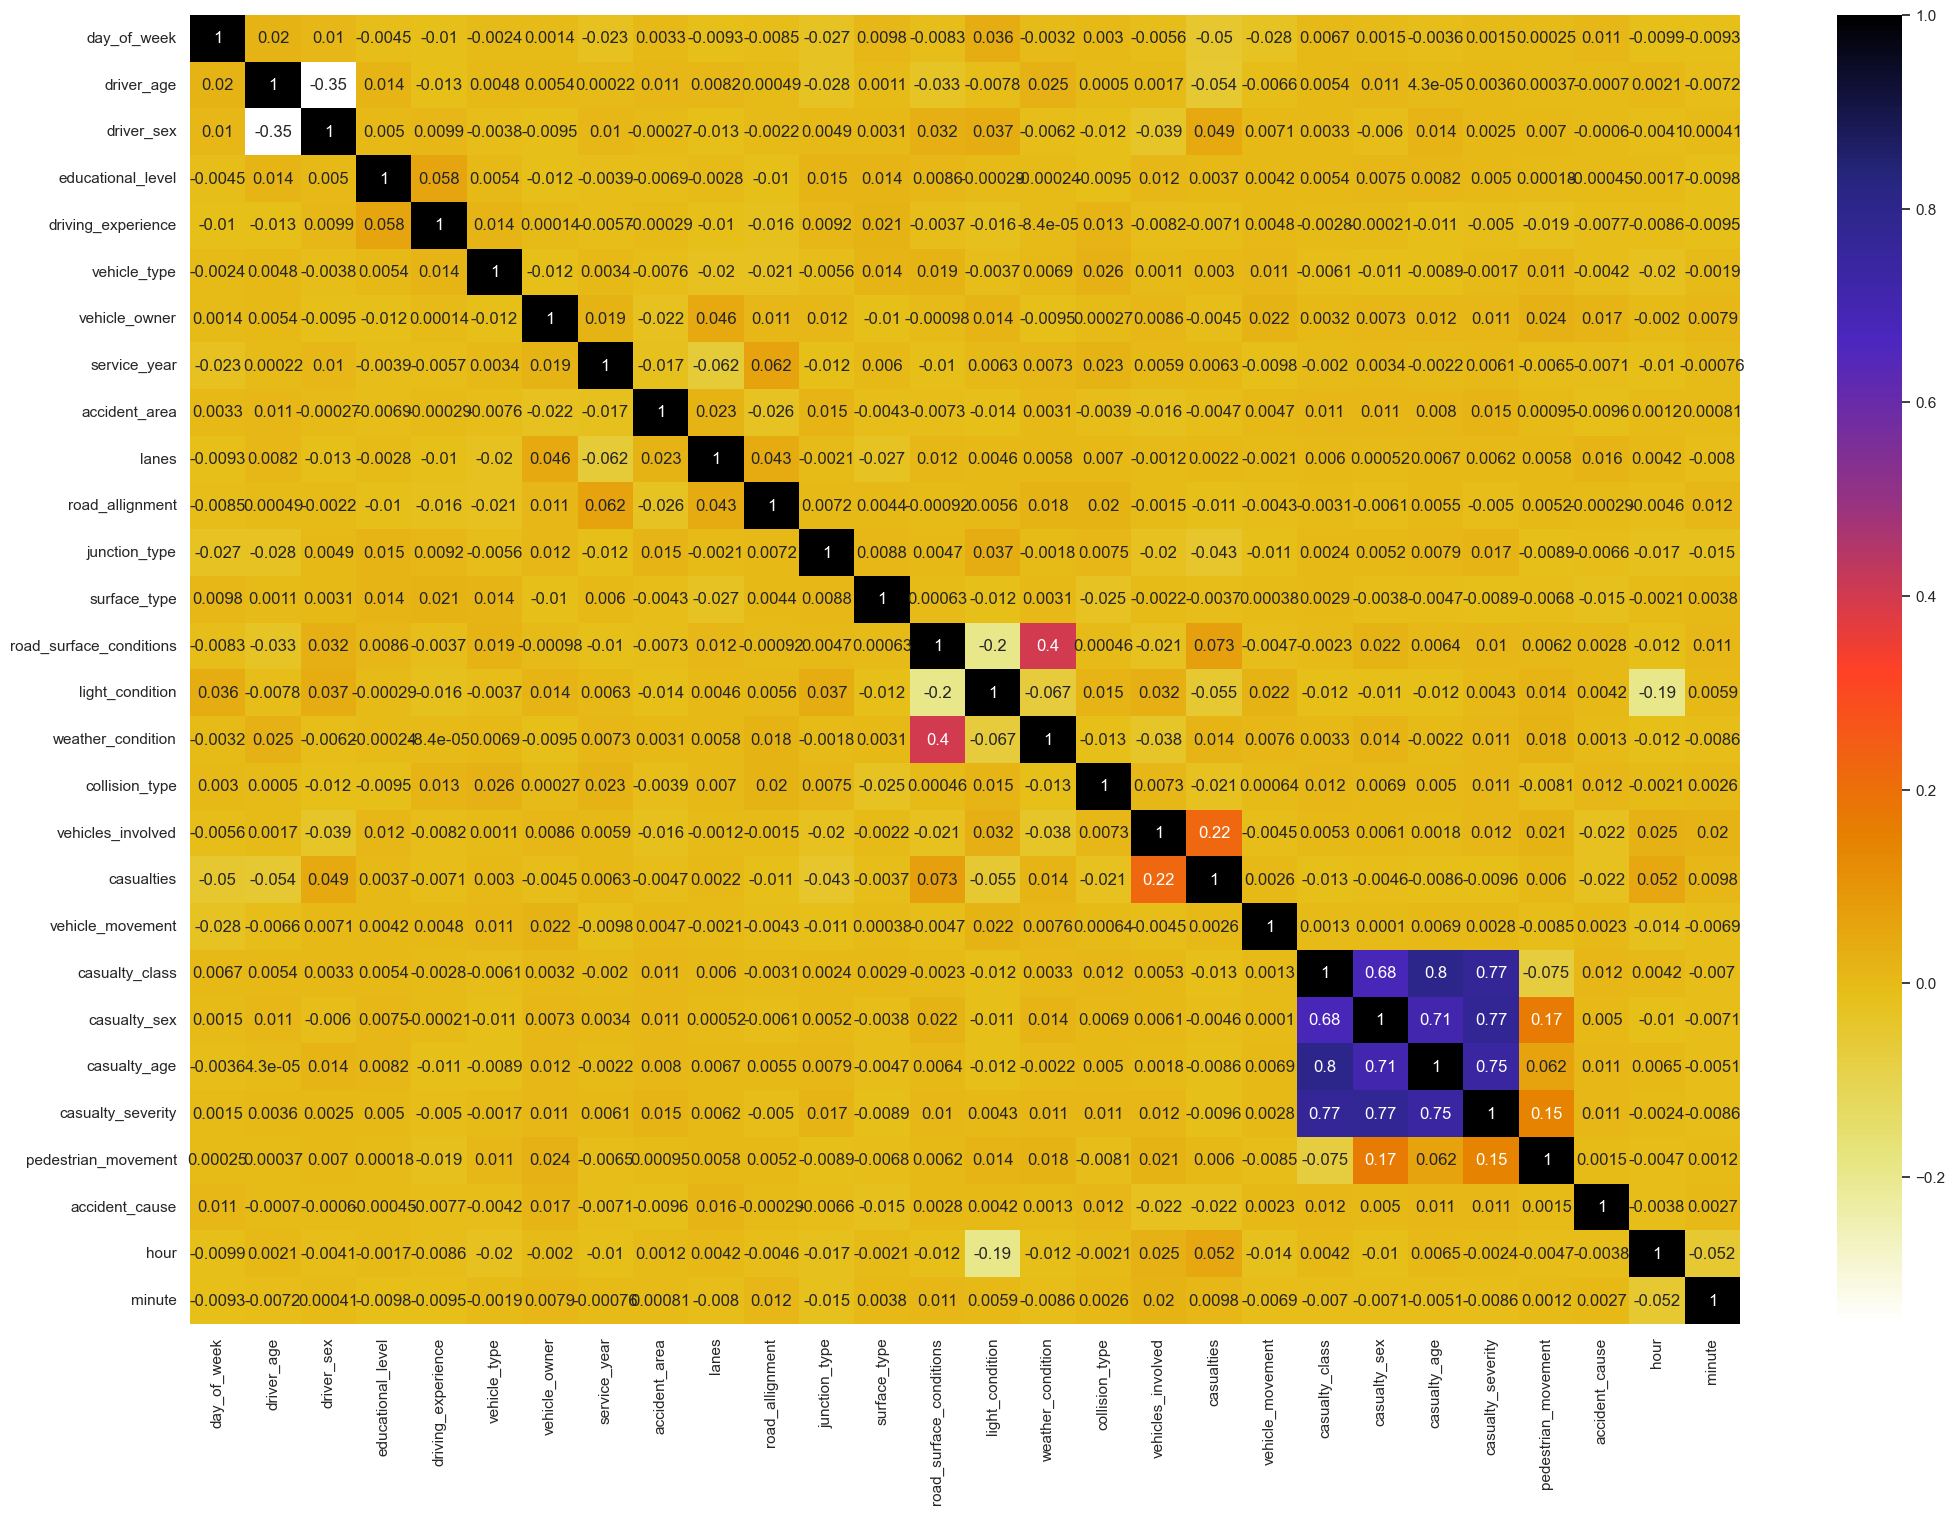

In [43]:
plt.figure(figsize = (25,17))
sns.set(font_scale = 1.0)
sns.heatmap(df.corr(),cmap=plt.cm.CMRmap_r,annot = True)

In [44]:
X = df.drop('accident_severity', axis=1)
y = df['accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 28) (3695, 28) (8621,) (3695,)


In [45]:
counter = Counter(y_train)
print("=============================")
for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print("=============================")
for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")
print("=============================")
print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= Slight Injury, n=7324 (84.96%)
Class= Serious Injury, n=1191 (13.82%)
Class= Fatal injury, n=106 (1.23%)
Class= Slight Injury, n=7324 (33.33%)
Class= Serious Injury, n=7324 (33.33%)
Class= Fatal injury, n=7324 (33.33%)
Upsampled data shape:  (21972, 28) (21972,)


In [46]:
y_test


4281      Slight Injury
4010      Slight Injury
1022     Serious Injury
8775      Slight Injury
10000     Slight Injury
              ...      
9855      Slight Injury
7302     Serious Injury
9023      Slight Injury
7936      Slight Injury
438       Slight Injury
Name: accident_severity, Length: 3695, dtype: object

In [47]:
y_test = org_encoder(pd.DataFrame(y_test, columns = ['accident_severity']), pd.DataFrame(y_test, columns = ['accident_severity']).columns)['accident_severity']
y_train = org_encoder(pd.DataFrame(y_train, columns = ['accident_severity']), pd.DataFrame(y_train, columns = ['accident_severity']).columns)['accident_severity']                                                    

In [48]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
        models.append(extree)
    return scores

In [51]:
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')
    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T
    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
    model = model
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    fig['layout'].update(showlegend = False, title = 'Model performance report'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        )
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

In [52]:
extree = ExtraTreesClassifier()
extree.fit(X_train, y_train)
y_pred = extree.predict(X_test)

In [53]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [54]:
model_performance(extree,y_test, y_pred)

In [55]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)
params = {
    'n_estimators': range(100, 500, 100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}
extree_estimator = ExtraTreesClassifier()
gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=3,
)
extree_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.8630889280460855)

In [56]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)
params2 = {
    'n_estimators': range(400, 800, 100),
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}
extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3,
                                n_estimators = 400)
gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)
extree_model2 = gsearch2.fit(X=X_train, y=y_train)
(gsearch2.best_params_, gsearch2.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'class_weight': None,
  'max_depth': 15,
  'min_samples_split': 2,
  'n_estimators': 600},
 0.9234746817702008)

In [57]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 400)

extree_tuned.fit(X_train, y_train)
y_pred_tuned = extree_tuned.predict(X_test)

In [58]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_predi = model.predict(X_test)
score = accuracy_score(y_test, y_predi)
print("Accuracy: ", score)

Accuracy:  0.7962110960757781


In [59]:
model.feature_importances_

array([0.05643279, 0.04991767, 0.00798268, 0.0300801 , 0.03999428,
       0.04671918, 0.01445267, 0.03434638, 0.04311231, 0.04528354,
       0.01583774, 0.0399222 , 0.00844389, 0.02885781, 0.04646362,
       0.01753   , 0.02863662, 0.049926  , 0.05102401, 0.02624329,
       0.02323391, 0.01731634, 0.02733634, 0.01480852, 0.00927827,
       0.05661135, 0.07024006, 0.0999684 ])

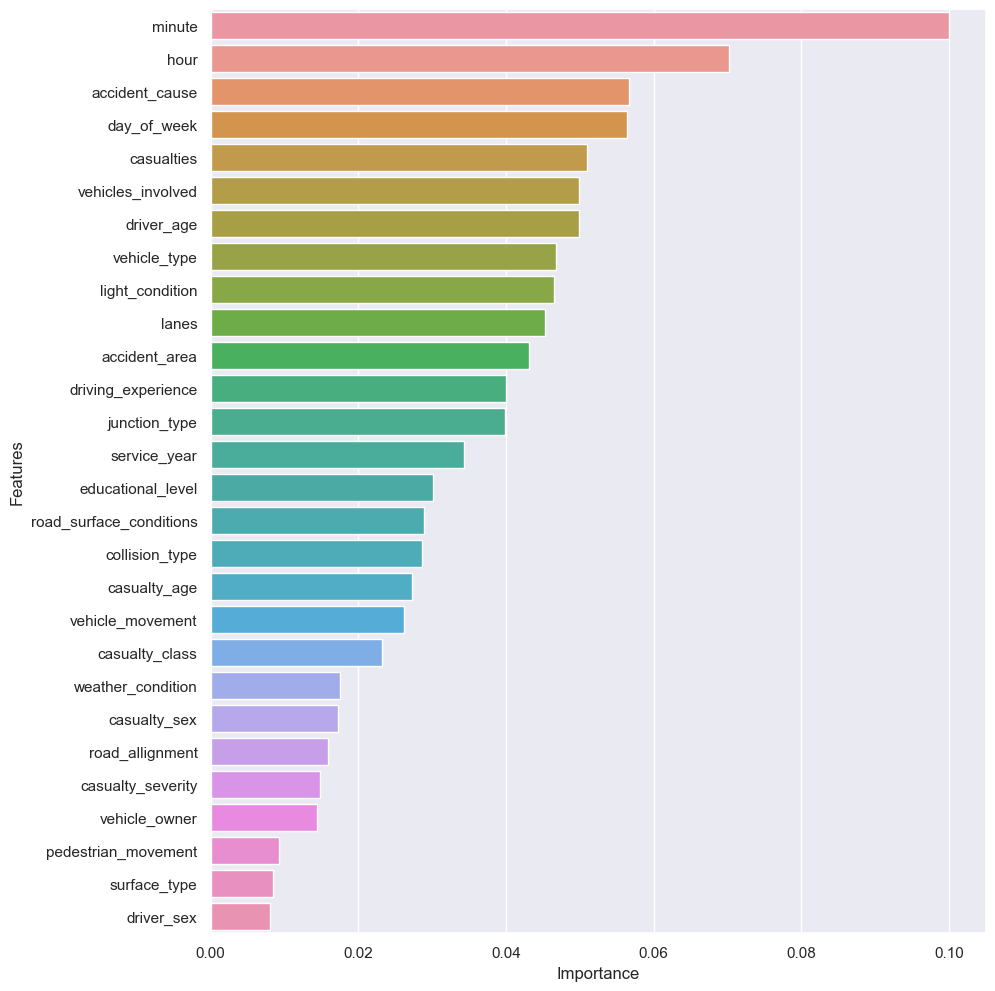

In [60]:
df_importance = pd.DataFrame()
df_importance['Features'] = X.columns
df_importance['Importance'] = model.feature_importances_
plt.figure(figsize=(10, 12))
sns.barplot(data = df_importance.sort_values("Importance", ascending=False), y='Features', x='Importance');

In [116]:
top15 = list(df_importance.sort_values("Importance", ascending=False)['Features'].head(15).values)
top15

['minute',
 'hour',
 'accident_cause',
 'day_of_week',
 'casualties',
 'vehicles_involved',
 'driver_age',
 'vehicle_type',
 'light_condition',
 'lanes',
 'accident_area',
 'driving_experience',
 'junction_type',
 'service_year',
 'educational_level']

In [117]:
df_top15 = df[top15]
df_top15

minute  hour  accident_cause  day_of_week  casualties  \
0           3    18              10            2           2   
1           3    18              17            2           2   
2           3    18               1            2           2   
3           7     2               2            4           2   
4           7     2              17            4           2   
...       ...   ...             ...          ...         ...   
12311      16    17              11            7           1   
12312       1    19              11            4           1   
12313      56    14               2            4           1   
12314      56    14               6            4           1   
12315      56    14               2            4           1   

       vehicles_involved  driver_age  vehicle_type  light_condition  lanes  \
0                      2           1             1                4      3   
1                      2           2            12                4      5   
2                      2           1             6                4      7   
3                      2           1            12                1      7   
4                      2           1             1                1      7   
...                  ...         ...           ...              ...    ...   
12311                  2           2             5                4      5   
12312                  2           5             1                4      3   
12313                  1           3             2                4      3   
12314                  2           1             6                1      5   
12315                  2           1             8                1      5   

       accident_area  driving_experience  junction_type  service_year  \
0                 10                   1              2             4   
1                  7                   4              2             3   
2                  2                   1              2             6   
3                  7                   3              8             6   
4                  5                   2              8             3   
...              ...                 ...            ...           ...   
12311              6                   2              2             6   
12312              6                   3              2             6   
12313              6                   3              2             2   
12314              7                   4              2             2   
12315              6                   3              3             2   

       educational_level  
0                      1  
1                      5  
2                      5  
3                      5  
4                      5  
...                  ...  
12311                  5  
12312                  2  
12313                  5  
12314                  5  
12315                  5  

[12316 rows x 15 columns]

In [127]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_top15, y, test_size=0.3, random_state=42)
print(X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape)

(8621, 15) (3695, 15) (8621,) (3695,)


In [128]:
model.fit(X_train_new, y_train_new)

RandomForestClassifier()

In [129]:
y_pred_new = model.predict(X_test_new)
score_new = accuracy_score(y_test_new, y_pred_new)
print("Accuracy: ", score_new)

Accuracy:  0.8427604871447902


In [130]:
with open("E:\TMLC\ML\Project 1\Random_forest_classifier.pkl", 'wb') as m:joblib.dump(model, m)

In [131]:
shap.initjs()

In [92]:
X_sample = X_train.sample(100)
X_sample

day_of_week  driver_age  driver_sex  educational_level  \
20842            1           2           2                  5   
20115            3           1           2                  5   
16987            6           3           2                  5   
16957            1           2           2                  3   
4088             6           2           2                  2   
...            ...         ...         ...                ...   
5018             5           2           2                  5   
1087             7           1           2                  5   
12062            5           1           2                  5   
16617            1           2           2                  5   
9659             1           2           2                  2   

       driving_experience  vehicle_type  vehicle_owner  service_year  \
20842                   3             1              4             5   
20115                   4             2              4             4   
16987                   2             1              4             1   
16957                   4             1              4             6   
4088                    5             1              4             6   
...                   ...           ...            ...           ...   
5018                    3            16              4             3   
1087                    3            15              4             6   
12062                   1            15              4             4   
16617                   1             1              4             6   
9659                    3             8              4             2   

       accident_area  lanes  road_allignment  junction_type  surface_type  \
20842              7      5                6              8             1   
20115              4      2                4              8             1   
16987              7      4                6              2             1   
16957              7      3                6              8             2   
4088               6      5                6              8             1   
...              ...    ...              ...            ...           ...   
5018               5      5                6              2             1   
1087               8      3                6              8             1   
12062              8      5                6              1             1   
16617              8      3                6              2             1   
9659               1      4                6              3             1   

       road_surface_conditions  light_condition  weather_condition  \
20842                        1                4                  3   
20115                        1                4                  3   
16987                        3                4                  4   
16957                        1                1                  3   
4088                         1                4                  3   
...                        ...              ...                ...   
5018                         1                4                  3   
1087                         1                4                  3   
12062                        1                1                  3   
16617                        1                4                  3   
9659                         1                3                  3   

       collision_type  vehicles_involved  casualties  vehicle_movement  \
20842               7                  2           1                 3   
20115               3                  4           2                 3   
16987               9                  2           2                 3   
16957               2                  1           1                 3   
4088                9                  3           3                 3   
...               ...                ...         ...               ...   
5018                9                  2           2                 5   
108

In [93]:
shap_values = shap.TreeExplainer(extree_tuned).shap_values(X_sample)

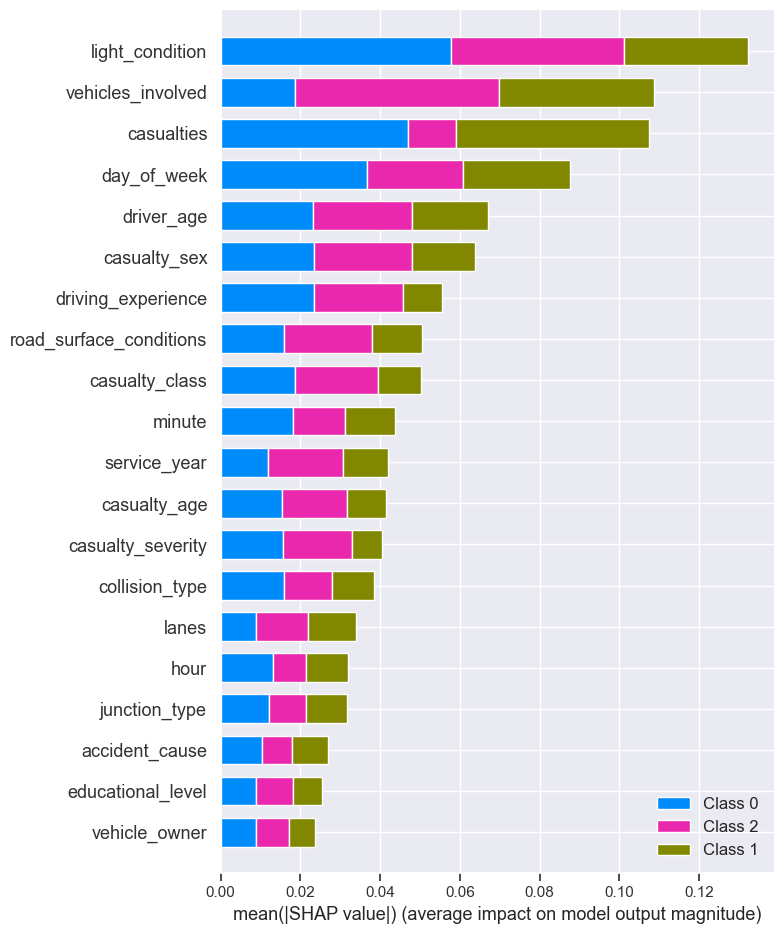

In [94]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")

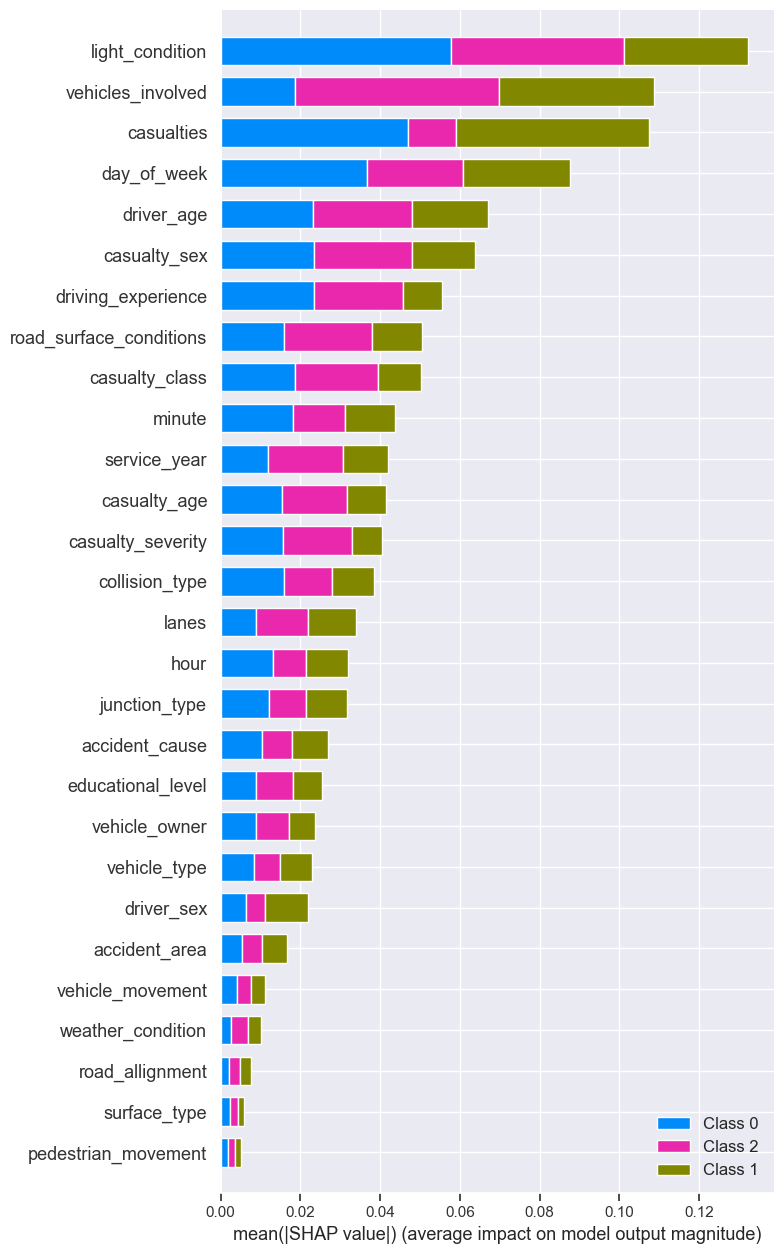

In [95]:
shap.summary_plot(shap_values, X_sample, max_display=28)

In [96]:
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0],shap_values[0][:],X_sample)

In [97]:
print(y_pred_tuned[50])
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0], shap_values[1][50], X_sample.iloc[50])

3


In [98]:
i=13
print(y_pred_tuned[i])
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0], shap_values[0][i], X_sample.values[i], feature_names = X_sample.columns)

2


3


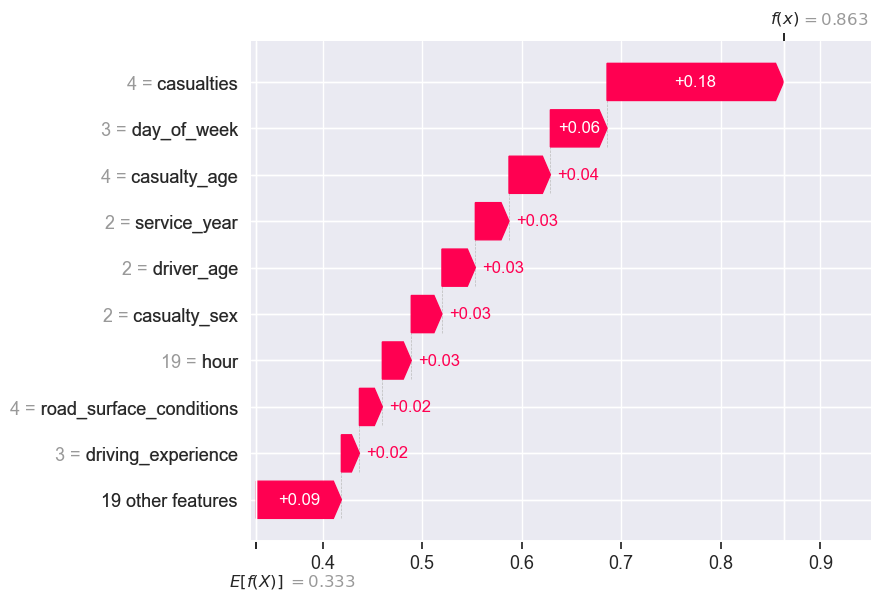

In [99]:
print(y_pred_tuned[10])
row = 10
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=shap.TreeExplainer(extree_tuned).expected_value[0], data=X_sample.iloc[row],  
                                         feature_names=X_sample.columns.tolist()))

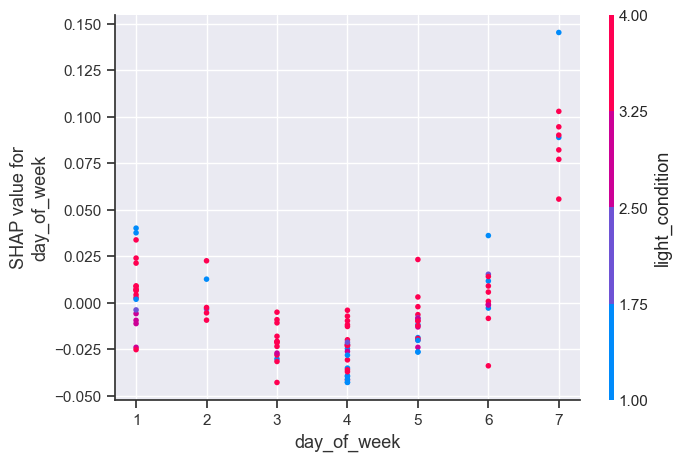

In [100]:
shap.dependence_plot('day_of_week', shap_values[2], X_sample)

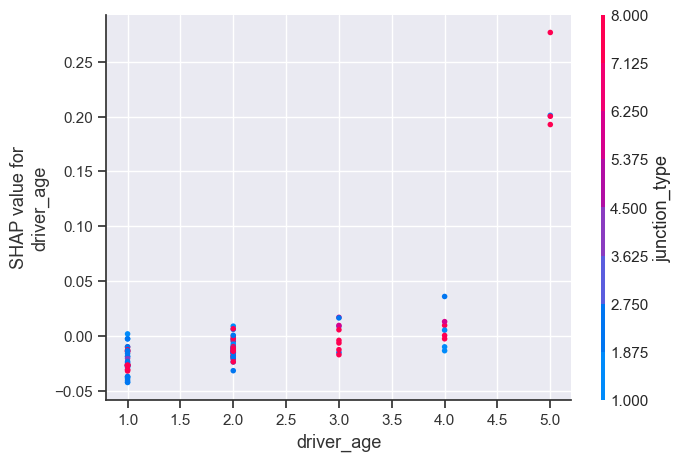

In [101]:
shap.dependence_plot('driver_age', shap_values[2], X_sample)

3


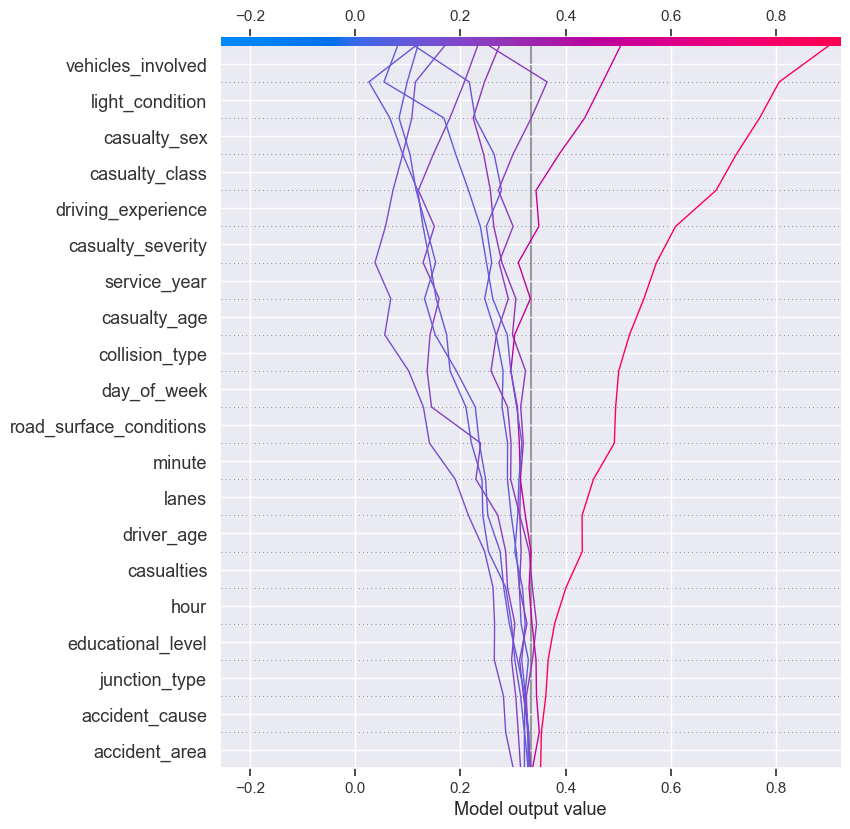

In [102]:
print(y_pred_tuned[10])
shap.decision_plot(shap.TreeExplainer(extree_tuned).expected_value[0], 
                   shap_values[2][:10], 
                   feature_names=X_sample.columns.tolist())